In [2]:
###############################################################################
# This notebook is a SOE Assessment equivalent re-engineered to have a        #
# complete undersanding of exams data in countries using it.                  #
###############################################################################
# Core stuff
import os
from pathlib import Path
import re

# Data stuff
import pandas as pd # Data analysis
import numpy as np

# Pretty printing stuff
from IPython.display import display, HTML
import pprint
pp = pprint.PrettyPrinter(indent=4)

# Plotting stuff
import matplotlib.pyplot as plt
from matplotlib import gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1.axes_divider import make_axes_area_auto_adjustable

# Initial setup
country = 'RMI' # FSM
test = 'MISAT' # NMCT
#achievement_levels = ['well below competent', 'approaching competent', 'minimally competent', 'competent'] # NMCT
achievement_levels = ['Beginning', 'Developing', 'Proficient', 'Advanced'] # MISAT

In [3]:
def load_excel_to_df(filename):
    """Loads an Excel filename to a Pandas DataFrame.

    Parameters
    ----------
    filename : str, required
        The filename of the excel file to load

    Raises
    ------
    NotImplementedError
        Could raise unknown error. Implement if it happens
    
    Returns
    -------
    DataFrame
    """
    file_path = Path(filename)
    file_extension = file_path.suffix.lower()[1:]

    if file_extension == 'xlsx':
        df_student_results = pd.read_excel(filename, index_col=None, header=0, engine='openpyxl')
    elif file_extension == 'xls':
        df_student_results = pd.read_excel(filename, index_col=None, header=0)
    elif file_extension == 'csv':
        df_student_results = pd.read_csv(filename, index_col=None, header=0)
    else:
        raise Exception("File not supported")

    return df_student_results

In [4]:
###############################################################################
# Responses Sheet                                                             #
###############################################################################

# Load a single SOE Assessment workbook (for testing,)
# in particular the sheet with the raw data
cwd = os.getcwd()
#filename = os.path.join(cwd, 'data/RMI/MISAT/MISAT 2019/3GrEng2019/AllSchools_A03_2018-19_Results.xls')
#filename = os.path.join(cwd, 'data/RMI/MISAT/MISAT 2012/6grEng12/AllSchools_A06_2011-12_Results.xls')
#filename = os.path.join(cwd, 'data/RMI/MISAT/MISAT 2009/3GrEng09/AllSchools_A03_2008-09_Results.xls')
filename = os.path.join(cwd, 'data/RMI/MISAT/MISAT 2010/6GrEng2010/AllSchools_A06_2009-10_Results.xls')

df_student_results = load_excel_to_df(filename)
print('df_student_results')
display(df_student_results)

df_student_results


,RecordNo,SchoolYear,TestID,TestName,IslandName,SchoolID,SchoolName,StudentID,StudentName,Gender,...,Item_031_AS0602020603M_ccc,Item_032_AS0602020604h_ccc,Item_033_AS0602020101E_ddd,Item_034_AS0602020102M_ddd,Item_035_AS0602020103M_aaa,Item_036_AS0602020103H_bbb,Item_037_AS0602020401E_ccc,Item_038_AS0602020402M_ddd,Item_039_AS0602020403M_bbb,Item_040_AS0602020404H_ccc
0,1,2009-10,A06,A06 - Reading Grade 6 - English,Ailinglaplap,101,Airok A,271,Jobina Jibon,f,...,B,B,C,D,A,D,D,C,C,B
1,2,2009-10,A06,A06 - Reading Grade 6 - English,Ailinglaplap,101,Airok A,267,Jokon Langidrik,m,...,A,C,D,C,A,A,C,B,D,C
2,3,2009-10,A06,A06 - Reading Grade 6 - English,Ailinglaplap,101,Airok A,265,Keyrose Tommy,f,...,B,A,D,D,A,C,B,A,D,C
3,4,2009-10,A06,A06 - Reading Grade 6 - English,Ailinglaplap,101,Airok A,259,Kyle Kabwa,m,...,D,C,D,B,D,B,C,A,D,B
4,5,2009-10,A06,A06 - Reading Grade 6 - English,Ailinglaplap,101,Airok A,268,Kyle Katjang,m,...,B,B,D,D,B,A,D,C,D,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1089,1056,2009-10,A06,A06 - Reading Grade 6 - English,Wotje,197,Wotje,149,Tarwos Ben,m,...,C,A,A,C,B,A,B,C,D,B
1090,1057,2009-10,A06,A06 - Reading Grade 6 - English,Wotto,198,Wotto,143,Campy Kattil,m,...,C,D,C,D,A,B,C,D,B,C
1091,1058,2009-10,A06,A06 - Reading Grade 6 - English,Wotto,198,Wotto,146,Dusty Jibde,m,...,C,A,C,A,D,C,C,B,A,C
1092,1059,2009-10,A06,A06 - Reading Grade 6 - English,Wotto,198,Wotto,145,Johnny Briand,m,...,A,C,B,D,A,A,B,A,B,C


In [5]:
%%time
###############################################################################
# NOT NEEDED                                                                  #
# Responses Sheet (all)                                                       #
###############################################################################

# Load all SOE Assessment workbook inside a directory
# (~50 seconds on iMac with i9 CPU and 32GB RAM)
#cwd = os.getcwd()
#path = os.path.join(cwd, 'data/'+country+'/'+test+'/')

#df_student_results_list = []

#for root, directories, files in os.walk(path, topdown=False):
#    for name in files:
#        filename = os.path.join(root, name)
#        print('Loading into DataFrame:', filename)
#        try:
#            df_student_results_list.append(load_excel_to_df(filename))
#        except:
#            print('Problem loading:', filename)
#            #print('Error was:', )            

#print('Completed loading excel files')

CPU times: user 1 µs, sys: 1e+03 ns, total: 2 µs
Wall time: 2.86 µs


In [6]:
###############################################################################
# Scores Sheet                                                                #
###############################################################################
def score(answer, item):
    """ Scores the answer.

    Parameters
    ----------
    answer : String, required
        The student's answer to an item (e.g. A, B, BLANK)
        
    Raises
    ------
    NotImplementedError
        Could raise unknown error. Implement if it happens
    
    Returns
    -------
    1 is correct, 0 if incorrect
    """
    if answer.upper() == item[-1].upper():
        return 1
    else:
        return 0

df_student_results_scores = df_student_results.copy()

cols = df_student_results_scores.columns.values
cols_items = [i for i in cols if 'Item_' in i]
cols_items.sort()

for item in cols_items:
    df_student_results_scores[item] = df_student_results_scores[item].apply(score, item, args=(item,))
display(df_student_results_scores)

,RecordNo,SchoolYear,TestID,TestName,IslandName,SchoolID,SchoolName,StudentID,StudentName,Gender,...,Item_031_AS0602020603M_ccc,Item_032_AS0602020604h_ccc,Item_033_AS0602020101E_ddd,Item_034_AS0602020102M_ddd,Item_035_AS0602020103M_aaa,Item_036_AS0602020103H_bbb,Item_037_AS0602020401E_ccc,Item_038_AS0602020402M_ddd,Item_039_AS0602020403M_bbb,Item_040_AS0602020404H_ccc
0,1,2009-10,A06,A06 - Reading Grade 6 - English,Ailinglaplap,101,Airok A,271,Jobina Jibon,f,...,0,0,0,1,1,0,0,0,0,0
1,2,2009-10,A06,A06 - Reading Grade 6 - English,Ailinglaplap,101,Airok A,267,Jokon Langidrik,m,...,0,1,1,0,1,0,1,0,0,1
2,3,2009-10,A06,A06 - Reading Grade 6 - English,Ailinglaplap,101,Airok A,265,Keyrose Tommy,f,...,0,0,1,1,1,0,0,0,0,1
3,4,2009-10,A06,A06 - Reading Grade 6 - English,Ailinglaplap,101,Airok A,259,Kyle Kabwa,m,...,0,1,1,0,0,1,1,0,0,0
4,5,2009-10,A06,A06 - Reading Grade 6 - English,Ailinglaplap,101,Airok A,268,Kyle Katjang,m,...,0,0,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1089,1056,2009-10,A06,A06 - Reading Grade 6 - English,Wotje,197,Wotje,149,Tarwos Ben,m,...,1,0,0,0,0,0,0,0,0,0
1090,1057,2009-10,A06,A06 - Reading Grade 6 - English,Wotto,198,Wotto,143,Campy Kattil,m,...,1,0,0,1,1,1,1,1,1,1
1091,1058,2009-10,A06,A06 - Reading Grade 6 - English,Wotto,198,Wotto,146,Dusty Jibde,m,...,1,0,0,0,0,0,1,0,0,1
1092,1059,2009-10,A06,A06 - Reading Grade 6 - English,Wotto,198,Wotto,145,Johnny Briand,m,...,0,1,0,1,1,0,0,0,1,1


From Phil Geeves' NDOE NSTT Reports for computing benchmark levels for students

# Appendix 1 Determining achievement levels for benchmarks

The FSM curriculum is divided into subject areas, standards, year levels and benchmarks.
The NMCT tests assesses each student as being at one of four achievement levels against
each benchmark:

- "competent"
- "minimally competent"
- "approaching competent"
- "well below competent"

The test is multiple choice, with, usually, four questions being used to assess the level of
achievement of any student. To be considered competent, all four questions must be
answered correctly.

For some seven benchmarks (out of 83 in total) there are more than 4 questions relating to
the benchmarks. These are organised in sets of 4 questions relating to a particular 'indicator'
associated with the benchmark. Two benchmarks have 12 questions and five have 8
questions. When determining the achievement level, the following business rules were
used.

<table>
    <caption>Minimum number of correct answers required for each achievement level</caption>
    <thead>
        <tr>
            <th>Achievement Level</th>
            <th colspan="3">Number of questions contributing to the benchmark assessment</th>            
        </tr>
        <tr>
            <th></th>
            <th>4</th>
            <th>8</th>
            <th>12</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>well below competent</td>
            <td style="text-align: center;">0</td>
            <td style="text-align: center;">0</td>
            <td style="text-align: center;">0</td>
        </tr>
        <tr>
            <td>approaching competent</td>
            <td style="text-align: center;">2</td>
            <td style="text-align: center;">3</td>
            <td style="text-align: center;">4</td>
        </tr>
        <tr>
            <td>minimally competent</td>
            <td style="text-align: center;">3</td>
            <td style="text-align: center;">5</td>
            <td style="text-align: center;">7</td>
        </tr>
        <tr>
            <td>competent</td>
            <td style="text-align: center;">4</td>
            <td style="text-align: center;">7</td>
            <td style="text-align: center;">10</td>
        </tr>
    </tbody>
</table>

In [7]:
###############################################################################
# AggregateScores Sheet                                                       #
###############################################################################
df_student_results_aggscores = df_student_results_scores.copy()

###############################################################################
# Utility functions
###############################################################################

def get_level(s):
    """ A function to get a level (i.e. Beginning, Developing, Advanced, Proficient)
    from a string of format A.6.2.1_L1Percent. The level is in the string itself (L1 -> Beginning).

    Parameters
    ----------
    s : String, required
        The level string representing an benchmark, standard or test (e.g. A.6.2.1_L1Percent)
        
    Raises
    ------
    NotImplementedError
        Could raise unknown error. Implement if it happens
    
    Returns
    -------
    level : String
    """ 
    levels = {
        'L1': 'Beginning',
        'L2': 'Developing',
        'L3': 'Proficient',
        'L4': 'Advanced',
    }
    try: 
        level = levels[s.split('_')[1].split('Percent')[0]]
    except:
        level = levels[s.split('Percent')[0]]
    return level

def get_bins(total_possible_scores):
    """ Getting total possible score is really optional code
    since the bins are essentially 4 equal bins no matter what the total items 
    for a indicators (or benchmark). But it is included here in case
    one would want to adjust the width of the bins.
    
    Otherwise, the bins could simply be set to 4 in pandas.cut
    and it would produce the same results as below.

    Parameters
    ----------
    total_possible_scores : Integer, required
        The total possible for a particular indicator or benchmark
        
    Raises
    ------
    NotImplementedError
        Could raise unknown error. Implement if it happens
    
    Returns
    -------
    bins : List
        The Scalar representing the bins
    """ 
    
    if len(total_possible_scores) != 1:
        print('Something is wrong. There should not be more then one total unique scores for a particular benchmark.')
        
    total_possible_score = total_possible_scores[0]
    
    if  total_possible_scores[0] == 4:
        bins = [0,1,2,3,4]
    elif total_possible_scores[0] == 8:
        bins = [0,2,4,6,8]
    elif total_possible_scores[0] == 12:
        bins = [0,3,6,9,12]
    elif total_possible_scores[0] == 16:
        bins = [0,4,8,12,16]
    elif total_possible_scores[0] == 20:
        bins = [0,5,10,15,20]
    elif total_possible_scores[0] == 24:
        bins = [0,6,12,18,24]    
    else:
        print('Unexpected number of bins.')
        
    return bins

###############################################################################    
# Columns e.g. A.6.2.1.3, A.6.2.1.4, A.6.2.2.1, etc. in SOE AggregateScores   
# i.e. indicators
###############################################################################

# e.g. {'A.6.2.1.4': ['Item_001_AS0602010401E_ddd', 'Item_002_AS0602010402M_aaa',]}
indicators_items = {}
# e.g. {'A.6.2.1': ['Item_001_AS0602010401E_ddd', 'Item_002_AS0602010402M_aaa',]}
benchmarks_items = {}

def compile_indicators(item):
    """ A function to compile the related items into their indicators (e.g. Test.Grade.Standard.Benchmark.Indicator).
    Note - In addition, this function also compiles the benchmarks_items ina similar way.

    Parameters
    ----------
    item : String, required
        The item string (e.g. Item_002_AS0602010402M_aaa)
        
    Raises
    ------
    NotImplementedError
        Could raise unknown error. Implement if it happens
    
    Returns
    -------
    Nothing
    """
    item_meta = item.split('_')
    item_parts = list(item_meta[2])
    indicator = item_parts[0] + '.' + item_parts[3] + '.' + item_parts[5] + '.' + item_parts[7] + '.' + item_parts[9]
    benchmark = item_parts[0] + '.' + item_parts[3] + '.' + item_parts[5] + '.' + item_parts[7]
    
    # Check if indicator already added, if not add it
    if indicator in indicators_items:       
        indicators_items[indicator].append(item)
    else:
        indicators_items[indicator] = [item]
        
    # Check if benchmark already added, if not add it
    if benchmark in benchmarks_items:       
        benchmarks_items[benchmark].append(item)
    else:
        benchmarks_items[benchmark] = [item]    

cols = df_student_results_aggscores.columns.values
cols_items = [i for i in cols if 'Item_' in i]

for i in cols_items:
    compile_indicators(i)

for ind in sorted(indicators_items.keys()):
    items = indicators_items[ind]
    df_student_results_aggscores[ind] = df_student_results_aggscores.loc[:, items].sum(axis=1)    

###############################################################################    
# Columns e.g. A.6.2.1.3Total, A.6.2.1.4Total, A.6.2.2.1Total, not shown in SOE AggregateScores
# but useful in next calculation
###############################################################################
for ind in sorted(indicators_items.keys()):
    items = indicators_items[ind]
    df_student_results_aggscores[ind+'Total'] = df_student_results_aggscores.loc[:, items].count(axis=1)
    
###############################################################################    
# Columns e.g. A.6.2.1, A.6.2.2, etc. not SOE AggregateScores   
# i.e. benchmarks (to bypass indicator like Phill Geeves)
###############################################################################    
for ben in sorted(benchmarks_items.keys()):
    items = benchmarks_items[ben]
    df_student_results_aggscores[ben] = df_student_results_aggscores.loc[:, items].sum(axis=1)    

###############################################################################    
# Columns e.g. A.6.2.1Total, A.6.2.2Total, not shown in SOE AggregateScores
# but useful in next calculation (to bypass indicator like Phill Geeves)
###############################################################################
for ben in sorted(benchmarks_items.keys()):
    items = benchmarks_items[ben]
    df_student_results_aggscores[ben+'Total'] = df_student_results_aggscores.loc[:, items].count(axis=1)
    
###############################################################################
# Columns e.g. A.6.2.1.3Level, A.6.2.1.4Level, A.6.2.2.1Level, etc. in SOE AggregateScores
###############################################################################
for ind in sorted(indicators_items.keys()):
    items = indicators_items[ind]
    total_possible_scores = df_student_results_aggscores[ind+'Total'].unique()
    bins = get_bins(total_possible_scores)
        
    df_student_results_aggscores[ind+'Level'] = pd.cut(df_student_results_aggscores[ind], bins, 
                                                       labels=achievement_levels, include_lowest=True)
    
###############################################################################    
# Columns e.g. A.6.2.1_L1Percent, A.6.2.1_L2Percent, A.6.2.1_L3Percent, A.6.2.1_L4Percent, A.6.2.2_L1Percent, A.6.2.2_L2Percent, etc. in SOE AggregateScores
# i.e. benchmarks
###############################################################################
# e.g. {'A.6.2.1': ['A.6.2.1.3Level', 'A.6.2.1.4Level',]}
benchmarks_indicators_levels = {}
# e.g. {'A.6.2.1': ['A.6.2.1.3', 'A.6.2.1.4',]}
benchmarks_indicators = {}
# e.g. {'A.6.2.1': ['A.6.2.1_L1Percent', 'A.6.2.1_L2Percent', 'A.6.2.1_L3Percent', 'A.6.2.1_L4Percent']}
benchmarks_levels_percent = {}

def compile_benchmarks(level):
    """ A function to compile the related indicators into their benchmarks (e.g. Test.Grade.Standard.Benchmark).

    Parameters
    ----------
    level : String, required
        The level string representing an indicator (e.g. A.6.2.1.3Level)
        
    Raises
    ------
    NotImplementedError
        Could raise unknown error. Implement if it happens
    
    Returns
    -------
    Nothing
    """    
    level_parts = level.split('.')
    benchmark = level_parts[0] + '.' + level_parts[1] + '.' + level_parts[2] + '.' + level_parts[3]
    #print('benchmark:', benchmark)
    # Check if group already added, if not add it
    indicator = level.split('Level')[0]
    if benchmark in benchmarks_indicators_levels:       
        benchmarks_indicators_levels[benchmark].append(level)
        benchmarks_indicators[benchmark].append(indicator)        
    else:
        benchmarks_indicators_levels[benchmark] = [level]
        benchmarks_indicators[benchmark] = [indicator]
        benchmarks_levels_percent[benchmark] = [benchmark+'_L1Percent',benchmark+'_L2Percent',benchmark+'_L3Percent',benchmark+'_L4Percent']

# Get indicators Level columns (i.e. A.6.2.1.3Level, A.6.2.1.4Level, A.6.2.2.1Level, etc.)
cols = df_student_results_aggscores.columns.values
cols_indicators_levels = [i for i in cols if 'Level' in i]        

for i in cols_indicators_levels:
    compile_benchmarks(i)

for b in sorted(benchmarks_indicators_levels.keys()):
    # Total indicators for the benchmark
    total_indicators = len(benchmarks_indicators_levels[b])
    print('A total of {} indicators ({}) for benchmarks {}.'.format(total_indicators, benchmarks_indicators_levels[b], b))  
    #level_nums = [i+'Num' for i in benchmarks_indicators_levels[b]]
    #print('level_nums', level_nums)
    
    df_level = df_student_results_aggscores.loc[:, benchmarks_indicators_levels[b]]
    df_student_results_aggscores[b+'_L1Percent'] = df_level[ df_level == 'Beginning' ].count(axis='columns') / total_indicators
    df_student_results_aggscores[b+'_L2Percent'] = df_level[ df_level == 'Developing' ].count(axis='columns') / total_indicators
    df_student_results_aggscores[b+'_L3Percent'] = df_level[ df_level == 'Proficient' ].count(axis='columns') / total_indicators
    df_student_results_aggscores[b+'_L4Percent'] = df_level[ df_level == 'Advanced' ].count(axis='columns') / total_indicators

###############################################################################    
# Columns e.g. A.6.2.1Level, A.6.2.2Level, etc. not in SOE AggregateScores
# but used in analyzing benchmarks like indicators are analized 
# (student count by levels)
# This will need to be set on defined business rule. They are based (calculated on)
# the columns e.g. A.6.2.1_L1Percent, A.6.2.1_L2Percent, A.6.2.1_L3Percent, A.6.2.1_L4Percent, A.6.2.2_L1Percent, A.6.2.2_L2Percent, A.6.2.2_L3Percent, A.6.2.2_L4Percent (i.e. benchmarks)
# The level with the highest percentage can be used. If two or more levels have equal percentages
# then take the (best or worst level?). It can do both by commenting/uncommenting lines below
# i.e. benchmarks
###############################################################################

for b in benchmarks_levels_percent:
    df1 = df_student_results_aggscores[benchmarks_levels_percent[b]] #.copy()
    # START: If highest maximum level is sought
    cols = df1.columns.to_list()
    cols.sort(reverse=True)
    df1 = df1[cols]
    # END: If highest maximum level is sought
    df_student_results_aggscores[b+'Level'] = df1.idxmax(axis=1)
    df_student_results_aggscores[b+'Level'] = df_student_results_aggscores[b+'Level'].apply(lambda x: get_level(x))


    
###############################################################################    
# Columns e.g. A.6.2_L1Percent, A.6.2_L2Percent, A.6.2_L3Percent, A.6.2_L4Percent, etc. in SOE AggregateScores
# i.e. standards
###############################################################################

# e.g. {'A.6.2': ['A.6.2.1.3Level', 'A.6.2.1.4Level', 'A.6.2.2.1Level', etc.]}
standards_indicators_levels = {}
# e.g. {'A.6.2': ['A.6.2.1.3', 'A.6.2.1.4', 'A.6.2.2.1', etc.]}
standards_indicators = {}
# e.g. {'A.6.2': ['A.6.2_L1Percent','A.6.2_L2Percent','A.6.2_L3Percent','A.6.2_L4Percent']}
standards_levels_percent = {}

def compile_standards(level):
    """ A function to compile the related indicators into their standards (e.g. Test.Grade.Standard).

    Parameters
    ----------
    level : String, required
        The level string representing an indicator (e.g. A.6.2.1.3Level)
        
    Raises
    ------
    NotImplementedError
        Could raise unknown error. Implement if it happens
    
    Returns
    -------
    Nothing
    """    
    level_parts = level.split('.')
    standard = level_parts[0] + '.' + level_parts[1] + '.' + level_parts[2]
    #print('standard:', standard)
    # Check if standard already added, if not add it
    indicator = level.split('Level')[0]
    if standard in standards_indicators_levels:       
        standards_indicators_levels[standard].append(level)
        standards_indicators[standard].append(indicator)
    else:
        standards_indicators_levels[standard] = [level]
        standards_indicators[standard] = [indicator]
        standards_levels_percent[standard] = [standard+'_L1Percent',standard+'_L2Percent',standard+'_L3Percent',standard+'_L4Percent']

# Get Level benchmarks columns (i.e. A.6.2.1Level, A.6.2.2Level, etc.)
# At this point we now have additional *Level columns for benchmarks
cols = df_student_results_aggscores.columns.values
cols_benchmarks_levels = [i for i in cols if 'Level' in i] 
cols_benchmarks_levels = list(set(cols_benchmarks_levels) - set(cols_indicators_levels))

for i in cols_indicators_levels:
    compile_standards(i)
    
for s in sorted(standards_indicators_levels.keys()):
    # Total indicators for the standard
    total_indicators = len(standards_indicators_levels[s])
    print('A total of {} indicators ({}) for standards {}.'.format(total_indicators, standards_indicators_levels[s], s))  
    
    df_level = df_student_results_aggscores.loc[:, standards_indicators_levels[s]]
    df_student_results_aggscores[s+'_L1Percent'] = df_level[ df_level == 'Beginning' ].count(axis='columns') / total_indicators
    df_student_results_aggscores[s+'_L2Percent'] = df_level[ df_level == 'Developing' ].count(axis='columns') / total_indicators
    df_student_results_aggscores[s+'_L3Percent'] = df_level[ df_level == 'Proficient' ].count(axis='columns') / total_indicators
    df_student_results_aggscores[s+'_L4Percent'] = df_level[ df_level == 'Advanced' ].count(axis='columns') / total_indicators    

###############################################################################    
# Columns e.g. A.6.2Level, etc. not in SOE AggregateScores
# but used in analyzing standards like indicators are analized 
# (student count by levels)
# This will need to be set on defined business rule. They are based (calculated on)
# the columns e.g. A.6.2_L1Percent, A.6.2_L2Percent, A.6.2_L3Percent, A.6.2_L4Percent (i.e. standards)
# The level with the higher percentage can be used. If two or more levels have equal percentages
# then take the (best or worst level?)
# i.e. standards
###############################################################################

for s in standards_levels_percent:
    df1 = df_student_results_aggscores[standards_levels_percent[s]] #.copy()
    # START: If highest maximum level is sought
    cols = df1.columns.to_list()
    cols.sort(reverse=True)
    df1 = df1[cols]
    # END: If highest maximum level is sought
    df_student_results_aggscores[s+'Level'] = df1.idxmax(axis=1)
    df_student_results_aggscores[s+'Level'] = df_student_results_aggscores[s+'Level'].apply(lambda x: get_level(x))

###############################################################################  
# Column TotalScore_* in SOE AggregateScores   
###############################################################################  
df_student_results_aggscores['TotalScore'] = df_student_results_aggscores.loc[:, cols_items].sum(axis=1)
df_student_results_aggscores['TotalScore_LowerLimit'] = df_student_results_aggscores['TotalScore'] - 6
df_student_results_aggscores['TotalScore_UpperLimit'] = df_student_results_aggscores['TotalScore'] + 6

###############################################################################    
# Columns e.g. L1Percent, L2Percent, L3Percent, L4Percent, etc. in SOE AggregateScores
# Should be named A.6L1Percent, A.6L2Percent, A.6L3Percent, A.6L4Percent, etc. for consistency
###############################################################################

# e.g. {'A.6': ['A.6.2.1.3Level', 'A.6.2.1.4Level', 'A.6.2.2.1Level', etc.]}
test_indicators_levels = {}
# e.g. {'A.6': ['A.6.2.1.3', 'A.6.2.1.4', 'A.6.2.2.1', etc.]}
test_indicators = {}
# e.g. {'A.6': ['L1Percent','L2Percent','L3Percent','L4Percent']}
# or if not following Dr. SOE to be more consistent would have been {'A.6': ['A.6_L1Percent','A.6_L2Percent','A.6_L3Percent','A.6_L4Percent']}
test_levels_percent = {}


def compile_test(level):
    """ A function to compile the related indicators into the whole test (e.g. Test.Grade).

    Parameters
    ----------
    level : String, required
        The level string representing an indicator (e.g. A.6.2.1.3Level)
        
    Raises
    ------
    NotImplementedError
        Could raise unknown error. Implement if it happens
    
    Returns
    -------
    Nothing
    """    
    level_parts = level.split('.')
    test = level_parts[0] + '.' + level_parts[1]
    #print('test:', test)
    # Check if test already added, if not add it
    indicator = level.split('Level')[0]
    if test in test_indicators_levels:       
        test_indicators_levels[test].append(level)
        test_indicators[test].append(indicator)
    else:        
        test_indicators_levels[test] = [level]
        test_indicators[test] = [indicator]
        test_levels_percent[test] = ['L1Percent','L2Percent','L3Percent','L4Percent']

# Get Level standards columns (i.e. A.6.2Level, etc.)
# At this point we now have additional *Level columns for standards and benchmarks
cols = df_student_results_aggscores.columns.values
cols_standards_levels = [i for i in cols if 'Level' in i] 
cols_standards_levels = list(set(cols_standards_levels) - set(cols_benchmarks_levels) - set(cols_indicators_levels))
        
for i in cols_indicators_levels:
    compile_test(i)
    
for t in sorted(test_indicators_levels.keys()):
    # Total indicators for the test
    total_indicators = len(test_indicators_levels[t])
    print('A total of {} indicators ({}) for test {}.'.format(total_indicators, test_indicators_levels[t], t))  
    
    df_level = df_student_results_aggscores.loc[:, test_indicators_levels[t]]
    df_student_results_aggscores['L1Percent'] = df_level[ df_level == 'Beginning' ].count(axis='columns') / total_indicators
    df_student_results_aggscores['L2Percent'] = df_level[ df_level == 'Developing' ].count(axis='columns') / total_indicators
    df_student_results_aggscores['L3Percent'] = df_level[ df_level == 'Proficient' ].count(axis='columns') / total_indicators
    df_student_results_aggscores['L4Percent'] = df_level[ df_level == 'Advanced' ].count(axis='columns') / total_indicators

###############################################################################    
# Columns e.g. A.6Level not in SOE AggregateScores
# but used in analyzing standards like indicators are analized 
# (student count by levels)
# This will need to be set on defined business rule. They are based (calculated on)
# the columns e.g. L1Percent, L2Percent, L3Percent, L4Percent (i.e. test)
# The level with the higher percentage can be used. If two or more levels have equal percentages
# then take the (best or worst level?)
# i.e. test
###############################################################################

for t in test_levels_percent:
    df1 = df_student_results_aggscores[test_levels_percent[t]] #.copy()
    # START: If highest maximum level is sought
    cols = df1.columns.to_list()
    cols.sort(reverse=True)
    df1 = df1[cols]
    # END: If highest maximum level is sought
    df_student_results_aggscores[t+'Level'] = df1.idxmax(axis=1)
    df_student_results_aggscores[t+'Level'] = df_student_results_aggscores[t+'Level'].apply(lambda x: get_level(x))
    
###############################################################################        
# Column AYP (Level 3 and 4) in SOE AggregateScores   
###############################################################################    
df_student_results_aggscores['AYP'] = df_student_results_aggscores['L3Percent'] + df_student_results_aggscores['L4Percent']

# Final column cleanup    
df_student_results_aggscores = df_student_results_aggscores.drop(cols_items, 1)

# Get Level test columns (i.e. A.6Level)
# At this point we now have additional *Level columns for test, standards and benchmarks
cols = df_student_results_aggscores.columns.values
cols_test_levels = [i for i in cols if 'Level' in i] 
cols_test_levels = list(set(cols_test_levels) - set(cols_standards_levels) - set(cols_benchmarks_levels) - set(cols_indicators_levels))

###############################################################################
# An alternate way of producing the same as above but by passing indicators
# directly into benchmarks i.e. A.6.2.1Level, A.6.2.2Level, etc. not in SOE AggregateScores
# this approach is based on Phill Geeves final report (refer to Appendix 1 in cell above)
# Compare results with above for curiosity
###############################################################################
for ben in sorted(benchmarks_items.keys()):
    items = benchmarks_items[ben]
    total_possible_scores = df_student_results_aggscores[ben+'Total'].unique()
    bins = get_bins(total_possible_scores)
    df_student_results_aggscores[ben+'LevelAlt'] = pd.cut(df_student_results_aggscores[ben], bins, 
                                                       labels=achievement_levels, include_lowest=True)

# Get Level benchmarks columns (i.e. A.6.2.1LevelAlt, A.6.2.2LevelAlt, etc.)
# At this point we now have additional *LevelAlt columns for benchmarks
cols = df_student_results_aggscores.columns.values
cols_benchmarks_levels_alt = [i for i in cols if 'LevelAlt' in i]

print('indicators_items')
pp.pprint(indicators_items)
print('benchmarks_items')
pp.pprint(benchmarks_items)
print('cols_indicators_levels')
pp.pprint(cols_indicators_levels)
print('cols_benchmarks_levels')
pp.pprint(cols_benchmarks_levels)
print('cols_benchmarks_levels_alt')
pp.pprint(cols_benchmarks_levels_alt)
print('cols_standards_levels')
pp.pprint(cols_standards_levels)
print('cols_test_levels')
pp.pprint(cols_test_levels)
print('benchmarks_indicators_levels')
pp.pprint(benchmarks_indicators_levels)
print('benchmarks_indicators')
pp.pprint(benchmarks_indicators)
print('benchmarks_levels_percent')
pp.pprint(benchmarks_levels_percent)
print('standards_indicators_levels')
pp.pprint(standards_indicators_levels)
print('standards_indicators')
pp.pprint(standards_indicators)
print('standards_levels_percent')
pp.pprint(standards_levels_percent)
print('test_indicators_levels')
pp.pprint(test_indicators_levels)
print('test_indicators')
pp.pprint(test_indicators)
print('test_levels_percent')
pp.pprint(test_levels_percent)
print(df_student_results_aggscores.columns)
display(df_student_results_aggscores)

A total of 2 indicators (['A.6.2.1.3Level', 'A.6.2.1.4Level']) for benchmarks A.6.2.1.
A total of 4 indicators (['A.6.2.2.1Level', 'A.6.2.2.2Level', 'A.6.2.2.4Level', 'A.6.2.2.6Level']) for benchmarks A.6.2.2.
A total of 1 indicators (['A.6.2.3.2Level']) for benchmarks A.6.2.3.
A total of 7 indicators (['A.6.2.1.3Level', 'A.6.2.1.4Level', 'A.6.2.2.1Level', 'A.6.2.2.2Level', 'A.6.2.2.4Level', 'A.6.2.2.6Level', 'A.6.2.3.2Level']) for standards A.6.2.
A total of 7 indicators (['A.6.2.1.3Level', 'A.6.2.1.4Level', 'A.6.2.2.1Level', 'A.6.2.2.2Level', 'A.6.2.2.4Level', 'A.6.2.2.6Level', 'A.6.2.3.2Level']) for test A.6.
indicators_items
{   'A.6.2.1.3': [   'Item_017_AS0602010301E_ccc',
                     'Item_018_AS0602010302M_aaa',
                     'Item_019_AS0602010303M_bbb',
                     'Item_020_AS0602010304H_aaa'],
    'A.6.2.1.4': [   'Item_001_AS0602010401E_ddd',
                     'Item_002_AS0602010402M_aaa',
                     'Item_003_AS0602010403M_ccc',
     

,RecordNo,SchoolYear,TestID,TestName,IslandName,SchoolID,SchoolName,StudentID,StudentName,Gender,...,TotalScore_UpperLimit,L1Percent,L2Percent,L3Percent,L4Percent,A.6Level,AYP,A.6.2.1LevelAlt,A.6.2.2LevelAlt,A.6.2.3LevelAlt
0,1,2009-10,A06,A06 - Reading Grade 6 - English,Ailinglaplap,101,Airok A,271,Jobina Jibon,f,...,18,0.571429,0.428571,0.000000,0.000000,Beginning,0.000000,Beginning,Developing,Developing
1,2,2009-10,A06,A06 - Reading Grade 6 - English,Ailinglaplap,101,Airok A,267,Jokon Langidrik,m,...,23,0.142857,0.857143,0.000000,0.000000,Developing,0.000000,Developing,Developing,Developing
2,3,2009-10,A06,A06 - Reading Grade 6 - English,Ailinglaplap,101,Airok A,265,Keyrose Tommy,f,...,18,0.714286,0.142857,0.142857,0.000000,Beginning,0.142857,Developing,Beginning,Beginning
3,4,2009-10,A06,A06 - Reading Grade 6 - English,Ailinglaplap,101,Airok A,259,Kyle Kabwa,m,...,20,0.571429,0.285714,0.142857,0.000000,Beginning,0.142857,Beginning,Developing,Beginning
4,5,2009-10,A06,A06 - Reading Grade 6 - English,Ailinglaplap,101,Airok A,268,Kyle Katjang,m,...,16,0.714286,0.285714,0.000000,0.000000,Beginning,0.000000,Beginning,Developing,Beginning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1089,1056,2009-10,A06,A06 - Reading Grade 6 - English,Wotje,197,Wotje,149,Tarwos Ben,m,...,21,0.285714,0.571429,0.000000,0.142857,Developing,0.142857,Proficient,Beginning,Developing
1090,1057,2009-10,A06,A06 - Reading Grade 6 - English,Wotto,198,Wotto,143,Campy Kattil,m,...,35,0.000000,0.285714,0.428571,0.285714,Proficient,0.714286,Proficient,Proficient,Advanced
1091,1058,2009-10,A06,A06 - Reading Grade 6 - English,Wotto,198,Wotto,146,Dusty Jibde,m,...,16,0.714286,0.285714,0.000000,0.000000,Beginning,0.000000,Developing,Beginning,Beginning
1092,1059,2009-10,A06,A06 - Reading Grade 6 - English,Wotto,198,Wotto,145,Johnny Briand,m,...,23,0.142857,0.571429,0.285714,0.000000,Developing,0.285714,Beginning,Developing,Proficient


In [8]:
# Playing with Bin values into discrete intervals.

bins = pd.IntervalIndex.from_tuples([(0, 1), (2, 3), (4, 5)])
#display(bins)
pd.cut([0, 0.5, 1.5, 2.5, 4.5], bins, retbins=True, include_lowest=True)

s4 = pd.Series(np.array([0, 1, 2, 3, 4]))
#display(s4)
#c4a = pd.cut(s4, 4, labels=achievement_levels, retbins=True, right=True)
#display(c4a)
c4b = pd.cut(s4, [0,1,2,3,4], labels=achievement_levels, retbins=True, include_lowest=True)
display(c4b)

s8 = pd.Series(np.array([0, 1, 2, 3, 4, 5, 6, 7, 8]))
#display(s8)
#c8a = pd.cut(s8, 4, labels=achievement_levels, retbins=True, right=True)
#display(c8a)
c8b = pd.cut(s8, [0,2,4,6,8], labels=achievement_levels, retbins=True, include_lowest=True)
display(c8b)

s12 = pd.Series(np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]))
#display(s12)
#c12a = pd.cut(s12, 4, labels=achievement_levels, retbins=True, right=True)
#display(c12a)
c12b = pd.cut(s12, [0,3,6,9,12], labels=achievement_levels, retbins=True, include_lowest=True)
display(c12b)

(0     Beginning
 1     Beginning
 2    Developing
 3    Proficient
 4      Advanced
 dtype: category
 Categories (4, object): ['Beginning' < 'Developing' < 'Proficient' < 'Advanced'],
 array([0, 1, 2, 3, 4]))

(0     Beginning
 1     Beginning
 2     Beginning
 3    Developing
 4    Developing
 5    Proficient
 6    Proficient
 7      Advanced
 8      Advanced
 dtype: category
 Categories (4, object): ['Beginning' < 'Developing' < 'Proficient' < 'Advanced'],
 array([0, 2, 4, 6, 8]))

(0      Beginning
 1      Beginning
 2      Beginning
 3      Beginning
 4     Developing
 5     Developing
 6     Developing
 7     Proficient
 8     Proficient
 9     Proficient
 10      Advanced
 11      Advanced
 12      Advanced
 dtype: category
 Categories (4, object): ['Beginning' < 'Developing' < 'Proficient' < 'Advanced'],
 array([ 0,  3,  6,  9, 12]))

In [9]:
###############################################################################
# Results Sheet                                                               #
###############################################################################
df_student_results_analysis = df_student_results_aggscores.copy()
#display(df_student_results_analysis)

print('School Name = {} (N = {})'.format('AllSchools', df_student_results_analysis.count()[0]))
print('Test Name = {} (Test Date = {})'.format(df_student_results_analysis['TestName'][0], df_student_results_analysis['SchoolYear'][0]))

df_indicators = df_student_results_analysis[['StudentName','Gender'] + cols_indicators_levels] #['StudentName'] + 
print('Indicators Levels')
display(df_indicators)

df_benchmarks = df_student_results_analysis[['StudentName','Gender'] + cols_benchmarks_levels] #['StudentName'] + 
print('Benchmarks Levels')
display(df_benchmarks)

df_benchmarks_alt = df_student_results_analysis[['StudentName','Gender'] + cols_benchmarks_levels_alt] #['StudentName'] + 
print('Benchmarks Levels Alt')
display(df_benchmarks_alt)

df_standards = df_student_results_analysis[['StudentName','Gender'] + cols_standards_levels] #['StudentName'] + 
print('Standards Levels')
display(df_standards)

df_test = df_student_results_analysis[['StudentName','Gender'] + cols_test_levels] #['StudentName'] + 
print('Test Levels')
display(df_test)

School Name = AllSchools (N = 1094)
Test Name = A06 - Reading Grade 6 - English (Test Date = 2009-10)
Indicators Levels


,StudentName,Gender,A.6.2.1.3Level,A.6.2.1.4Level,A.6.2.2.1Level,A.6.2.2.2Level,A.6.2.2.4Level,A.6.2.2.6Level,A.6.2.3.2Level
0,Jobina Jibon,f,Beginning,Beginning,Developing,Developing,Beginning,Beginning,Developing
1,Jokon Langidrik,m,Beginning,Developing,Developing,Developing,Developing,Developing,Developing
2,Keyrose Tommy,f,Beginning,Developing,Proficient,Beginning,Beginning,Beginning,Beginning
3,Kyle Kabwa,m,Beginning,Beginning,Developing,Beginning,Developing,Proficient,Beginning
4,Kyle Katjang,m,Beginning,Beginning,Developing,Developing,Beginning,Beginning,Beginning
...,...,...,...,...,...,...,...,...,...
1089,Tarwos Ben,m,Advanced,Developing,Beginning,Developing,Beginning,Developing,Developing
1090,Campy Kattil,m,Proficient,Developing,Proficient,Proficient,Advanced,Developing,Advanced
1091,Dusty Jibde,m,Developing,Beginning,Beginning,Beginning,Developing,Beginning,Beginning
1092,Johnny Briand,m,Proficient,Beginning,Developing,Developing,Developing,Developing,Proficient


Benchmarks Levels


,StudentName,Gender,A.6.2.2Level,A.6.2.3Level,A.6.2.1Level
0,Jobina Jibon,f,Developing,Developing,Beginning
1,Jokon Langidrik,m,Developing,Developing,Developing
2,Keyrose Tommy,f,Beginning,Beginning,Developing
3,Kyle Kabwa,m,Developing,Beginning,Beginning
4,Kyle Katjang,m,Developing,Beginning,Beginning
...,...,...,...,...,...
1089,Tarwos Ben,m,Developing,Developing,Advanced
1090,Campy Kattil,m,Proficient,Advanced,Proficient
1091,Dusty Jibde,m,Beginning,Beginning,Developing
1092,Johnny Briand,m,Developing,Proficient,Proficient


Benchmarks Levels Alt


,StudentName,Gender,A.6.2.1LevelAlt,A.6.2.2LevelAlt,A.6.2.3LevelAlt
0,Jobina Jibon,f,Beginning,Developing,Developing
1,Jokon Langidrik,m,Developing,Developing,Developing
2,Keyrose Tommy,f,Developing,Beginning,Beginning
3,Kyle Kabwa,m,Beginning,Developing,Beginning
4,Kyle Katjang,m,Beginning,Developing,Beginning
...,...,...,...,...,...
1089,Tarwos Ben,m,Proficient,Beginning,Developing
1090,Campy Kattil,m,Proficient,Proficient,Advanced
1091,Dusty Jibde,m,Developing,Beginning,Beginning
1092,Johnny Briand,m,Beginning,Developing,Proficient


Standards Levels


,StudentName,Gender,A.6.2Level
0,Jobina Jibon,f,Beginning
1,Jokon Langidrik,m,Developing
2,Keyrose Tommy,f,Beginning
3,Kyle Kabwa,m,Beginning
4,Kyle Katjang,m,Beginning
...,...,...,...
1089,Tarwos Ben,m,Developing
1090,Campy Kattil,m,Proficient
1091,Dusty Jibde,m,Beginning
1092,Johnny Briand,m,Developing


Test Levels


,StudentName,Gender,A.6Level
0,Jobina Jibon,f,Beginning
1,Jokon Langidrik,m,Developing
2,Keyrose Tommy,f,Beginning
3,Kyle Kabwa,m,Beginning
4,Kyle Katjang,m,Beginning
...,...,...,...
1089,Tarwos Ben,m,Developing
1090,Campy Kattil,m,Proficient
1091,Dusty Jibde,m,Beginning
1092,Johnny Briand,m,Developing


In [10]:
# Utility function for cells that follow

def prepare_for_chart(df):
    """Does some basic redundent preparation to a dataframe before plotting with matplotlib.
    Essentially it does the following:
     * Computes the percentage (e.g. 0.1, 0.9)
     * Adds a Total row with 100 percent (i.e. 1)
     * Rounds all values to 2 decimals
     * Re-order the levels ready for plotting
     * Assign negative values for levels to be on the bottom (or left) of the axis

    Parameters
    ----------
    filename : df, required
        The DataFrame to prep

    Raises
    ------
    NotImplementedError
        Could raise unknown error. Implement if it happens
    
    Returns
    -------
    DataFrame
    """
    # When level values don't add up to 1 it's because of rounding
    df = df.apply(lambda x: x / float(x.sum()))
    df.loc['Total'] = df.sum()
    df = df.round(2)
    levels_index = ['Proficient','Advanced','Developing','Beginning','Total']
    df = df.reindex(levels_index)
    df.loc[['Developing','Beginning']] = df.loc[['Developing','Beginning']].apply(lambda x: -x)
    return df

def add_total_in_column_names(df, cols_levels, index='Index'):
    """Adds a string or the form (n=X) in the columns showing the total.

    Parameters
    ----------
    df : DataFrame, required
        The DataFrame to prep
    cos_levels : List, required
        A list of levels columns
    index : String, required
        Whether we dealing with Index or MultiIndex

    Raises
    ------
    NotImplementedError
        Could raise unknown error. Implement if it happens
    
    Returns
    -------
    DataFrame
    """
    
    if index == 'Index':
        print('Dealing with a pd.core.indexes.base.Index')
        for l in cols_levels:
            tot = df[l.split('Level')[0]].sum()
            df = df.rename(columns = {l.split('Level')[0]: l.split('Level')[0]+' (n='+str(tot)+')'})
        return df
    elif index == 'MultiIndex':
        print('Dealing with a pd.core.indexes.multi.MultiIndex')
        # First flatten MultiIndex (Indicator/Gender)
        df.columns = ['_'.join(col) for col in df.columns.values]

        for l in cols_levels:
            for g in ['f','m']:
                col = l.split('Level')[0]+'_'+g
                tot = df[col].sum()
                df = df.rename(columns = {col: col+' (n='+str(tot)+')'})

        # Unflatten back to MultiIndex
        cols = [col.split('_') for col in df.columns.values]
        arrays = [[ i for i, j in cols ], [ j for i, j in cols ]]
        df.columns = pd.MultiIndex.from_arrays(arrays, names=(None, 'Gender'))
        return df

In [11]:
###############################################################################
# Results Sheet                                                               
# Analysis by indicators just like SOE assessment                             
# BUT also provides:
#  * gender disaggregation not provided in SOE at this level 
#  * with totals
#  * extended versions (with descriptions)
#  * benchmarks, standards and test analysed just like indicators 
#    (student count)
###############################################################################

descriptions = {
    'indicators' : {
        'A.6.2.1.3': 'A.6.2.1.3 - And some description of an indicator, it could be pretty long text actually, be ready.',
        'A.6.2.1.4': 'A.6.2.1.4 - And some description of an indicator, it could be pretty long text actually, be ready.',
        'A.6.2.2.1': 'A.6.2.2.1 - And some description of an indicator, it could be pretty long text actually, be ready.',
        'A.6.2.2.2': 'A.6.2.2.2 - And some description of an indicator, it could be pretty long text actually, be ready.',
        'A.6.2.2.4': 'A.6.2.2.4 - And some description of an indicator, it could be pretty long text actually, be ready.',
        'A.6.2.2.6': 'A.6.2.2.6 - And some description of an indicator, it could be pretty long text actually, be ready.',
        'A.6.2.3.2': 'A.6.2.3.2 - And some description of an indicator, it could be pretty long text actually, be ready.'},
    'benchmarks': {
        'A.6.2.1': 'A.6.2.1 - And some description of an benchmark, it could be pretty long text actually, be ready.',
        'A.6.2.2': 'A.6.2.2 - And some description of an benchmark, it could be pretty long text actually, be ready.',
        'A.6.2.3': 'A.6.2.3 - And some description of an benchmark, it could be pretty long text actually, be ready.',
    },
    'benchmarksalt': {
        'A.6.2.1': 'A.6.2.1 - And some description of an benchmark, it could be pretty long text actually, be ready.',
        'A.6.2.2': 'A.6.2.2 - And some description of an benchmark, it could be pretty long text actually, be ready.',
        'A.6.2.3': 'A.6.2.3 - And some description of an benchmark, it could be pretty long text actually, be ready.',
    },
    'standards' : {
        'A.6.2': 'A.6.2 - Some description about a reading standard.'
    },
    'test' : {
        'A.6': 'Reading Grade 6 - English'
    }
}


def num_student_for_each_rubric_level(cols_levels, df_metric, metric):
    """A function to produce various variations of DataFrame used later in Analysis.

    Parameters
    ----------
    cols_levels : List, required
        A list of levels columns for the metric to be processed (e.g. ['A.6.2.1.3Level', etc.] for indicators
    df_metric : DataFrame, required
        The starting DataFrame to process
    metric : String, required
        A label identifying the metric to be processed (i.e. indicators, benchmarks, standards and test)
        
    Raises
    ------
    NotImplementedError
        Could raise unknown error. Implement if it happens
    
    Returns
    -------
    dfs : Dict
        Key value dictionary of dataframes available for later processing
    
    """
    print('-------------------------------------------------------------')
    print('Number of All Students for Each Rubric Level of '+metric)
    print('-------------------------------------------------------------')
    
    #######################################
    # Summary
    #######################################
    metrics = []

    display(cols_levels)

    for m in cols_levels:
        df = df_metric[['StudentName',m]].groupby([m]).count()    
        df.rename(columns = {'StudentName':m.split('Level')[0]}, inplace = True)
        df.index.name = None
        metrics.append(df)

    df_summary = pd.concat(metrics, axis=1)
    print('df_'+metric+'_summary')
    display(df_summary)

    #######################################
    # Summary by gender
    #######################################
    metric_gender = []

    for m in cols_levels:
        df = df_metric[['StudentName','Gender',m]].groupby([m, 'Gender']).count()    
        df = df.unstack()
        df.rename(columns = {'StudentName':m.split('Level')[0]}, inplace = True)
        df.index.name = None
    
        metric_gender.append(df)

    df_summary_gender = pd.concat(metric_gender, axis=1)
    print('df_'+metric+'_summary_gender')
    display(df_summary_gender)
    
    #######################################
    # Summary (extended version)
    #######################################
    df_summary_x = df_summary.rename(columns = descriptions[metric])
    print('df_'+metric+'_summary_x')
    display(df_summary_x)
    
    #######################################
    # Summary by gender (extended version)
    #######################################
    df_summary_gender_x = df_summary_gender.rename(columns = descriptions[metric])
    print('df_'+metric+'_summary_gender_x')
    display(df_summary_gender_x)

    #######################################
    # Summary including Total row
    #######################################
    df_summary_tot = df_summary.copy()
    df_summary_tot.loc['Total'] = df_summary_tot.sum()
    print('df_'+metric+'_summary_tot')
    display(df_summary_tot)

    #######################################
    # Summary including Total row by gender
    #######################################
    df_summary_gender_tot = df_summary_gender.copy()
    df_summary_gender_tot.loc['Total'] = df_summary_gender_tot.sum()
    print('df_'+metric+'_summary_gender_tot')
    display(df_summary_gender_tot)
    
    #######################################
    # Summary percent
    #######################################
    df_summary_per = df_summary.copy()
    df_summary_per = add_total_in_column_names(df_summary_per, cols_levels, index='Index')
    df_summary_per = prepare_for_chart(df_summary_per)
    print('df_'+metric+'_summary_per')
    display(df_summary_per)

    #######################################
    # Summary percent by gender
    #######################################
    df_summary_gender_per = df_summary_gender.copy()
    df_summary_gender_per = add_total_in_column_names(df_summary_gender_per, cols_levels, index='MultiIndex')
    df_summary_gender_per = prepare_for_chart(df_summary_gender_per)
    print('df_'+metric+'_summary_gender_per')
    display(df_summary_gender_per)

    #######################################
    # Summary percent (extended version)
    #######################################  
    df_summary_temp = df_summary.copy()
    for m in cols_levels:
        tot = df_summary_temp[m.split('Level')[0]].sum()
        df_summary_per_x = df_summary_temp.rename(columns = descriptions[metric])

    df_summary_per_x = prepare_for_chart(df_summary_per_x)
    print('df_'+metric+'_summary_per_x')
    display(df_summary_per_x)

    #######################################
    # Summary percent by gender (extended version)
    #######################################
    df_summary_gender_per_x = df_summary_gender.copy()
    df_summary_gender_per_x = add_total_in_column_names(df_summary_gender_per_x, cols_levels, index='MultiIndex')
    df_summary_gender_per_x = df_summary_gender_per_x.rename(columns = descriptions[metric])
    df_summary_gender_per_x = prepare_for_chart(df_summary_gender_per_x)
    print('df_'+metric+'_summary_gender_per_x')
    display(df_summary_gender_per_x)   
    
    # Troubleshooting
    #print('===============================================')
    #print('df_'+metric+'_summary_per')
    #display(df_summary_per) 
    
    dfs = {         
        'df_'+metric+'_summary': df_summary,
        'df_'+metric+'_summary_gender': df_summary_gender,
        'df_'+metric+'_summary_x' : df_summary_x,
        'df_'+metric+'_summary_gender_x' : df_summary_gender_x,
        'df_'+metric+'_summary_tot' : df_summary_tot,
        'df_'+metric+'_summary_gender_tot' : df_summary_gender_tot,
        'df_'+metric+'_summary_per' : df_summary_per,
        'df_'+metric+'_summary_gender_per' : df_summary_gender_per,
        'df_'+metric+'_summary_per_x' : df_summary_per_x,
        'df_'+metric+'_summary_gender_per_x' : df_summary_gender_per_x
    }
    return dfs

##############################################################################
# Analysis of Indicators just like in SOE Assessment
##############################################################################
students_each_rubric_level = num_student_for_each_rubric_level(cols_indicators_levels, df_indicators, 'indicators')

##############################################################################
# Not in SOE Assessment but included for comparison
# This is benchmarks, standards and test analysis but analysed 
# like SOE analyses indicators
##############################################################################
students_each_rubric_level.update(num_student_for_each_rubric_level(cols_benchmarks_levels, df_benchmarks, 'benchmarks'))
students_each_rubric_level.update(num_student_for_each_rubric_level(cols_benchmarks_levels_alt, df_benchmarks_alt, 'benchmarksalt'))
students_each_rubric_level.update(num_student_for_each_rubric_level(cols_standards_levels, df_standards, 'standards'))
students_each_rubric_level.update(num_student_for_each_rubric_level(cols_test_levels, df_test, 'test'))

-------------------------------------------------------------
Number of All Students for Each Rubric Level of indicators
-------------------------------------------------------------


['A.6.2.1.3Level',
 'A.6.2.1.4Level',
 'A.6.2.2.1Level',
 'A.6.2.2.2Level',
 'A.6.2.2.4Level',
 'A.6.2.2.6Level',
 'A.6.2.3.2Level']

df_indicators_summary


,A.6.2.1.3,A.6.2.1.4,A.6.2.2.1,A.6.2.2.2,A.6.2.2.4,A.6.2.2.6,A.6.2.3.2
Beginning,619,573,633,471,443,681,496
Developing,268,370,239,340,392,264,280
Proficient,133,105,123,208,160,113,174
Advanced,74,46,99,75,99,36,144


df_indicators_summary_gender


A.6.2.1.3      A.6.2.1.4      A.6.2.2.1      A.6.2.2.2       \
Gender             f    m         f    m         f    m         f    m   
Beginning        340  279       296  277       321  312       234  237   
Developing       127  141       201  169       133  106       173  167   
Proficient        67   66        51   54        59   64       120   88   
Advanced          37   37        23   23        58   41        44   31   

           A.6.2.2.4      A.6.2.2.6      A.6.2.3.2       
Gender             f    m         f    m         f    m  
Beginning        207  236       349  332       242  254  
Developing       217  175       149  115       152  128  
Proficient        92   68        49   64        93   81  
Advanced          55   44        24   12        84   60

df_indicators_summary_x


,"A.6.2.1.3 - And some description of an indicator, it could be pretty long text actually, be ready.","A.6.2.1.4 - And some description of an indicator, it could be pretty long text actually, be ready.","A.6.2.2.1 - And some description of an indicator, it could be pretty long text actually, be ready.","A.6.2.2.2 - And some description of an indicator, it could be pretty long text actually, be ready.","A.6.2.2.4 - And some description of an indicator, it could be pretty long text actually, be ready.","A.6.2.2.6 - And some description of an indicator, it could be pretty long text actually, be ready.","A.6.2.3.2 - And some description of an indicator, it could be pretty long text actually, be ready."
Beginning,619,573,633,471,443,681,496
Developing,268,370,239,340,392,264,280
Proficient,133,105,123,208,160,113,174
Advanced,74,46,99,75,99,36,144


df_indicators_summary_gender_x


A.6.2.1.3 - And some description of an indicator, it could be pretty long text actually, be ready.  \
Gender                                                                                                      f   
Beginning                                                 340                                                   
Developing                                                127                                                   
Proficient                                                 67                                                   
Advanced                                                   37                                                   

                 \
Gender        m   
Beginning   279   
Developing  141   
Proficient   66   
Advanced     37   

           A.6.2.1.4 - And some description of an indicator, it could be pretty long text actually, be ready.  \
Gender                                                                                                      f   
Beginning                                                 296                                                   
Developing                                                201                                                   
Proficient                                                 51                                                   
Advanced                                                   23                                                   

                 \
Gender        m   
Beginning   277   
Developing  169   
Proficient   54   
Advanced     23   

           A.6.2.2.1 - And some description of an indicator, it could be pretty long text actually, be ready.  \
Gender                                                                                                      f   
Beginning                                                 321                                                   
Developing                                                133                                                   
Proficient                                                 59                                                   
Advanced                                                   58                                                   

                 \
Gender        m   
Beginning   312   
Developing  106   
Proficient   64   
Advanced     41   

           A.6.2.2.2 - And some description of an indicator, it could be pretty long text actually, be ready.  \
Gender                                                                                                      f   
Beginning                                                 234                                                   
Developing                                                173                                                   
Proficient                                                120                                                   
Advanced                                                   44                                                   

                 \
Gender        m   
Beginning   237   
Developing  167   
Proficient   88   
Advanced     31   

           A.6.2.2.4 - And some description of an indicator, it could be pretty long text actually, be ready.  \
Gender                                                                                                      f   
Beginning                                                 207                                                   
Developing                                                217                                                   
Proficient                                                 92                                                   
Advanced                                                   55                                                   

                 \
Gender        m   
Beginning   236   
Developing  175   
Proficient   68   
Advanced     44   

           A.6.2.2.6 - And some descripti

df_indicators_summary_tot


,A.6.2.1.3,A.6.2.1.4,A.6.2.2.1,A.6.2.2.2,A.6.2.2.4,A.6.2.2.6,A.6.2.3.2
Beginning,619,573,633,471,443,681,496
Developing,268,370,239,340,392,264,280
Proficient,133,105,123,208,160,113,174
Advanced,74,46,99,75,99,36,144
Total,1094,1094,1094,1094,1094,1094,1094


df_indicators_summary_gender_tot


A.6.2.1.3      A.6.2.1.4      A.6.2.2.1      A.6.2.2.2       \
Gender             f    m         f    m         f    m         f    m   
Beginning        340  279       296  277       321  312       234  237   
Developing       127  141       201  169       133  106       173  167   
Proficient        67   66        51   54        59   64       120   88   
Advanced          37   37        23   23        58   41        44   31   
Total            571  523       571  523       571  523       571  523   

           A.6.2.2.4      A.6.2.2.6      A.6.2.3.2       
Gender             f    m         f    m         f    m  
Beginning        207  236       349  332       242  254  
Developing       217  175       149  115       152  128  
Proficient        92   68        49   64        93   81  
Advanced          55   44        24   12        84   60  
Total            571  523       571  523       571  523

Dealing with a pd.core.indexes.base.Index
df_indicators_summary_per


,A.6.2.1.3 (n=1094),A.6.2.1.4 (n=1094),A.6.2.2.1 (n=1094),A.6.2.2.2 (n=1094),A.6.2.2.4 (n=1094),A.6.2.2.6 (n=1094),A.6.2.3.2 (n=1094)
Proficient,0.12,0.10,0.11,0.19,0.15,0.10,0.16
Advanced,0.07,0.04,0.09,0.07,0.09,0.03,0.13
Developing,-0.24,-0.34,-0.22,-0.31,-0.36,-0.24,-0.26
Beginning,-0.57,-0.52,-0.58,-0.43,-0.40,-0.62,-0.45
Total,1.00,1.00,1.00,1.00,1.00,1.00,1.00


Dealing with a pd.core.indexes.multi.MultiIndex
df_indicators_summary_gender_per


A.6.2.1.3           A.6.2.1.4           A.6.2.2.1            \
Gender     f (n=571) m (n=523) f (n=571) m (n=523) f (n=571) m (n=523)   
Proficient      0.12      0.13      0.09      0.10      0.10      0.12   
Advanced        0.06      0.07      0.04      0.04      0.10      0.08   
Developing     -0.22     -0.27     -0.35     -0.32     -0.23     -0.20   
Beginning      -0.60     -0.53     -0.52     -0.53     -0.56     -0.60   
Total           1.00      1.00      1.00      1.00      1.00      1.00   

           A.6.2.2.2           A.6.2.2.4           A.6.2.2.6            \
Gender     f (n=571) m (n=523) f (n=571) m (n=523) f (n=571) m (n=523)   
Proficient      0.21      0.17      0.16      0.13      0.09      0.12   
Advanced        0.08      0.06      0.10      0.08      0.04      0.02   
Developing     -0.30     -0.32     -0.38     -0.33     -0.26     -0.22   
Beginning      -0.41     -0.45     -0.36     -0.45     -0.61     -0.63   
Total           1.00      1.00      1.00      1.00      1.00      1.00   

           A.6.2.3.2            
Gender     f (n=571) m (n=523)  
Proficient      0.16      0.15  
Advanced        0.15      0.11  
Developing     -0.27     -0.24  
Beginning      -0.42     -0.49  
Total           1.00      1.00

df_indicators_summary_per_x


,"A.6.2.1.3 - And some description of an indicator, it could be pretty long text actually, be ready.","A.6.2.1.4 - And some description of an indicator, it could be pretty long text actually, be ready.","A.6.2.2.1 - And some description of an indicator, it could be pretty long text actually, be ready.","A.6.2.2.2 - And some description of an indicator, it could be pretty long text actually, be ready.","A.6.2.2.4 - And some description of an indicator, it could be pretty long text actually, be ready.","A.6.2.2.6 - And some description of an indicator, it could be pretty long text actually, be ready.","A.6.2.3.2 - And some description of an indicator, it could be pretty long text actually, be ready."
Proficient,0.12,0.10,0.11,0.19,0.15,0.10,0.16
Advanced,0.07,0.04,0.09,0.07,0.09,0.03,0.13
Developing,-0.24,-0.34,-0.22,-0.31,-0.36,-0.24,-0.26
Beginning,-0.57,-0.52,-0.58,-0.43,-0.40,-0.62,-0.45
Total,1.00,1.00,1.00,1.00,1.00,1.00,1.00


Dealing with a pd.core.indexes.multi.MultiIndex
df_indicators_summary_gender_per_x


A.6.2.1.3 - And some description of an indicator, it could be pretty long text actually, be ready.  \
Gender                                                                                              f (n=571)   
Proficient                                               0.12                                                   
Advanced                                                 0.06                                                   
Developing                                              -0.22                                                   
Beginning                                               -0.60                                                   
Total                                                    1.00                                                   

                      \
Gender     m (n=523)   
Proficient      0.13   
Advanced        0.07   
Developing     -0.27   
Beginning      -0.53   
Total           1.00   

           A.6.2.1.4 - And some description of an indicator, it could be pretty long text actually, be ready.  \
Gender                                                                                              f (n=571)   
Proficient                                               0.09                                                   
Advanced                                                 0.04                                                   
Developing                                              -0.35                                                   
Beginning                                               -0.52                                                   
Total                                                    1.00                                                   

                      \
Gender     m (n=523)   
Proficient      0.10   
Advanced        0.04   
Developing     -0.32   
Beginning      -0.53   
Total           1.00   

           A.6.2.2.1 - And some description of an indicator, it could be pretty long text actually, be ready.  \
Gender                                                                                              f (n=571)   
Proficient                                               0.10                                                   
Advanced                                                 0.10                                                   
Developing                                              -0.23                                                   
Beginning                                               -0.56                                                   
Total                                                    1.00                                                   

                      \
Gender     m (n=523)   
Proficient      0.12   
Advanced        0.08   
Developing     -0.20   
Beginning      -0.60   
Total           1.00   

           A.6.2.2.2 - And some description of an indicator, it could be pretty long text actually, be ready.  \
Gender                                                                                              f (n=571)   
Proficient                                               0.21                                                   
Advanced                                                 0.08                                                   
Developing                                              -0.30                                                   
Beginning                                               -0.41                                                   
Total                                                    1.00                                                   

                      \
Gender     m (n=523)   
Proficient      0.17   
Advanced        0.06   
Developing     -0.32   
Beginning      -0.45   
Total           1.00   

           A.6.2.2.4 - And some description of an indicator, it could be pretty long text actually, be ready.  \
Gender                                                

-------------------------------------------------------------
Number of All Students for Each Rubric Level of benchmarks
-------------------------------------------------------------


['A.6.2.2Level', 'A.6.2.3Level', 'A.6.2.1Level']

df_benchmarks_summary


,A.6.2.2,A.6.2.3,A.6.2.1
Advanced,100,144,94
Beginning,563,496,362
Developing,309,280,453
Proficient,122,174,185


df_benchmarks_summary_gender


A.6.2.2      A.6.2.3      A.6.2.1     
Gender           f    m       f    m       f    m
Advanced        57   43      84   60      46   48
Beginning      277  286     242  254     196  166
Developing     173  136     152  128     236  217
Proficient      64   58      93   81      93   92

df_benchmarks_summary_x


,"A.6.2.2 - And some description of an benchmark, it could be pretty long text actually, be ready.","A.6.2.3 - And some description of an benchmark, it could be pretty long text actually, be ready.","A.6.2.1 - And some description of an benchmark, it could be pretty long text actually, be ready."
Advanced,100,144,94
Beginning,563,496,362
Developing,309,280,453
Proficient,122,174,185


df_benchmarks_summary_gender_x


A.6.2.2 - And some description of an benchmark, it could be pretty long text actually, be ready.  \
Gender                                                                                                    f   
Advanced                                                   57                                                 
Beginning                                                 277                                                 
Developing                                                173                                                 
Proficient                                                 64                                                 

                 \
Gender        m   
Advanced     43   
Beginning   286   
Developing  136   
Proficient   58   

           A.6.2.3 - And some description of an benchmark, it could be pretty long text actually, be ready.  \
Gender                                                                                                    f   
Advanced                                                   84                                                 
Beginning                                                 242                                                 
Developing                                                152                                                 
Proficient                                                 93                                                 

                 \
Gender        m   
Advanced     60   
Beginning   254   
Developing  128   
Proficient   81   

           A.6.2.1 - And some description of an benchmark, it could be pretty long text actually, be ready.  \
Gender                                                                                                    f   
Advanced                                                   46                                                 
Beginning                                                 196                                                 
Developing                                                236                                                 
Proficient                                                 93                                                 

                 
Gender        m  
Advanced     48  
Beginning   166  
Developing  217  
Proficient   92

df_benchmarks_summary_tot


,A.6.2.2,A.6.2.3,A.6.2.1
Advanced,100,144,94
Beginning,563,496,362
Developing,309,280,453
Proficient,122,174,185
Total,1094,1094,1094


df_benchmarks_summary_gender_tot


A.6.2.2      A.6.2.3      A.6.2.1     
Gender           f    m       f    m       f    m
Advanced        57   43      84   60      46   48
Beginning      277  286     242  254     196  166
Developing     173  136     152  128     236  217
Proficient      64   58      93   81      93   92
Total          571  523     571  523     571  523

Dealing with a pd.core.indexes.base.Index
df_benchmarks_summary_per


,A.6.2.2 (n=1094),A.6.2.3 (n=1094),A.6.2.1 (n=1094)
Proficient,0.11,0.16,0.17
Advanced,0.09,0.13,0.09
Developing,-0.28,-0.26,-0.41
Beginning,-0.51,-0.45,-0.33
Total,1.00,1.00,1.00


Dealing with a pd.core.indexes.multi.MultiIndex
df_benchmarks_summary_gender_per


A.6.2.2             A.6.2.3             A.6.2.1          
Gender     f (n=571) m (n=523) f (n=571) m (n=523) f (n=571) m (n=523)
Proficient      0.11      0.11      0.16      0.15      0.16      0.18
Advanced        0.10      0.08      0.15      0.11      0.08      0.09
Developing     -0.30     -0.26     -0.27     -0.24     -0.41     -0.41
Beginning      -0.49     -0.55     -0.42     -0.49     -0.34     -0.32
Total           1.00      1.00      1.00      1.00      1.00      1.00

df_benchmarks_summary_per_x


,"A.6.2.2 - And some description of an benchmark, it could be pretty long text actually, be ready.","A.6.2.3 - And some description of an benchmark, it could be pretty long text actually, be ready.","A.6.2.1 - And some description of an benchmark, it could be pretty long text actually, be ready."
Proficient,0.11,0.16,0.17
Advanced,0.09,0.13,0.09
Developing,-0.28,-0.26,-0.41
Beginning,-0.51,-0.45,-0.33
Total,1.00,1.00,1.00


Dealing with a pd.core.indexes.multi.MultiIndex
df_benchmarks_summary_gender_per_x


A.6.2.2 - And some description of an benchmark, it could be pretty long text actually, be ready.  \
Gender                                                                                            f (n=571)   
Proficient                                               0.11                                                 
Advanced                                                 0.10                                                 
Developing                                              -0.30                                                 
Beginning                                               -0.49                                                 
Total                                                    1.00                                                 

                      \
Gender     m (n=523)   
Proficient      0.11   
Advanced        0.08   
Developing     -0.26   
Beginning      -0.55   
Total           1.00   

           A.6.2.3 - And some description of an benchmark, it could be pretty long text actually, be ready.  \
Gender                                                                                            f (n=571)   
Proficient                                               0.16                                                 
Advanced                                                 0.15                                                 
Developing                                              -0.27                                                 
Beginning                                               -0.42                                                 
Total                                                    1.00                                                 

                      \
Gender     m (n=523)   
Proficient      0.15   
Advanced        0.11   
Developing     -0.24   
Beginning      -0.49   
Total           1.00   

           A.6.2.1 - And some description of an benchmark, it could be pretty long text actually, be ready.  \
Gender                                                                                            f (n=571)   
Proficient                                               0.16                                                 
Advanced                                                 0.08                                                 
Developing                                              -0.41                                                 
Beginning                                               -0.34                                                 
Total                                                    1.00                                                 

                      
Gender     m (n=523)  
Proficient      0.18  
Advanced        0.09  
Developing     -0.41  
Beginning      -0.32  
Total           1.00

-------------------------------------------------------------
Number of All Students for Each Rubric Level of benchmarksalt
-------------------------------------------------------------


['A.6.2.1LevelAlt', 'A.6.2.2LevelAlt', 'A.6.2.3LevelAlt']

df_benchmarksalt_summary


,A.6.2.1,A.6.2.2,A.6.2.3
Beginning,498,370,496
Developing,429,487,280
Proficient,120,154,174
Advanced,47,83,144


df_benchmarksalt_summary_gender


A.6.2.1      A.6.2.2      A.6.2.3     
Gender           f    m       f    m       f    m
Beginning      260  238     185  185     242  254
Developing     226  203     250  237     152  128
Proficient      60   60      89   65      93   81
Advanced        25   22      47   36      84   60

df_benchmarksalt_summary_x


,"A.6.2.1 - And some description of an benchmark, it could be pretty long text actually, be ready.","A.6.2.2 - And some description of an benchmark, it could be pretty long text actually, be ready.","A.6.2.3 - And some description of an benchmark, it could be pretty long text actually, be ready."
Beginning,498,370,496
Developing,429,487,280
Proficient,120,154,174
Advanced,47,83,144


df_benchmarksalt_summary_gender_x


A.6.2.1 - And some description of an benchmark, it could be pretty long text actually, be ready.  \
Gender                                                                                                    f   
Beginning                                                 260                                                 
Developing                                                226                                                 
Proficient                                                 60                                                 
Advanced                                                   25                                                 

                 \
Gender        m   
Beginning   238   
Developing  203   
Proficient   60   
Advanced     22   

           A.6.2.2 - And some description of an benchmark, it could be pretty long text actually, be ready.  \
Gender                                                                                                    f   
Beginning                                                 185                                                 
Developing                                                250                                                 
Proficient                                                 89                                                 
Advanced                                                   47                                                 

                 \
Gender        m   
Beginning   185   
Developing  237   
Proficient   65   
Advanced     36   

           A.6.2.3 - And some description of an benchmark, it could be pretty long text actually, be ready.  \
Gender                                                                                                    f   
Beginning                                                 242                                                 
Developing                                                152                                                 
Proficient                                                 93                                                 
Advanced                                                   84                                                 

                 
Gender        m  
Beginning   254  
Developing  128  
Proficient   81  
Advanced     60

df_benchmarksalt_summary_tot


,A.6.2.1,A.6.2.2,A.6.2.3
Beginning,498,370,496
Developing,429,487,280
Proficient,120,154,174
Advanced,47,83,144
Total,1094,1094,1094


df_benchmarksalt_summary_gender_tot


A.6.2.1      A.6.2.2      A.6.2.3     
Gender           f    m       f    m       f    m
Beginning      260  238     185  185     242  254
Developing     226  203     250  237     152  128
Proficient      60   60      89   65      93   81
Advanced        25   22      47   36      84   60
Total          571  523     571  523     571  523

Dealing with a pd.core.indexes.base.Index
df_benchmarksalt_summary_per


,A.6.2.1 (n=1094),A.6.2.2 (n=1094),A.6.2.3 (n=1094)
Proficient,0.11,0.14,0.16
Advanced,0.04,0.08,0.13
Developing,-0.39,-0.45,-0.26
Beginning,-0.46,-0.34,-0.45
Total,1.00,1.00,1.00


Dealing with a pd.core.indexes.multi.MultiIndex
df_benchmarksalt_summary_gender_per


A.6.2.1             A.6.2.2             A.6.2.3          
Gender     f (n=571) m (n=523) f (n=571) m (n=523) f (n=571) m (n=523)
Proficient      0.11      0.11      0.16      0.12      0.16      0.15
Advanced        0.04      0.04      0.08      0.07      0.15      0.11
Developing     -0.40     -0.39     -0.44     -0.45     -0.27     -0.24
Beginning      -0.46     -0.46     -0.32     -0.35     -0.42     -0.49
Total           1.00      1.00      1.00      1.00      1.00      1.00

df_benchmarksalt_summary_per_x


,"A.6.2.1 - And some description of an benchmark, it could be pretty long text actually, be ready.","A.6.2.2 - And some description of an benchmark, it could be pretty long text actually, be ready.","A.6.2.3 - And some description of an benchmark, it could be pretty long text actually, be ready."
Proficient,0.11,0.14,0.16
Advanced,0.04,0.08,0.13
Developing,-0.39,-0.45,-0.26
Beginning,-0.46,-0.34,-0.45
Total,1.00,1.00,1.00


Dealing with a pd.core.indexes.multi.MultiIndex
df_benchmarksalt_summary_gender_per_x


A.6.2.1 - And some description of an benchmark, it could be pretty long text actually, be ready.  \
Gender                                                                                            f (n=571)   
Proficient                                               0.11                                                 
Advanced                                                 0.04                                                 
Developing                                              -0.40                                                 
Beginning                                               -0.46                                                 
Total                                                    1.00                                                 

                      \
Gender     m (n=523)   
Proficient      0.11   
Advanced        0.04   
Developing     -0.39   
Beginning      -0.46   
Total           1.00   

           A.6.2.2 - And some description of an benchmark, it could be pretty long text actually, be ready.  \
Gender                                                                                            f (n=571)   
Proficient                                               0.16                                                 
Advanced                                                 0.08                                                 
Developing                                              -0.44                                                 
Beginning                                               -0.32                                                 
Total                                                    1.00                                                 

                      \
Gender     m (n=523)   
Proficient      0.12   
Advanced        0.07   
Developing     -0.45   
Beginning      -0.35   
Total           1.00   

           A.6.2.3 - And some description of an benchmark, it could be pretty long text actually, be ready.  \
Gender                                                                                            f (n=571)   
Proficient                                               0.16                                                 
Advanced                                                 0.15                                                 
Developing                                              -0.27                                                 
Beginning                                               -0.42                                                 
Total                                                    1.00                                                 

                      
Gender     m (n=523)  
Proficient      0.15  
Advanced        0.11  
Developing     -0.24  
Beginning      -0.49  
Total           1.00

-------------------------------------------------------------
Number of All Students for Each Rubric Level of standards
-------------------------------------------------------------


['A.6.2Level']

df_standards_summary


,A.6.2
Advanced,90
Beginning,664
Developing,234
Proficient,106


df_standards_summary_gender


A.6.2     
Gender         f    m
Advanced      52   38
Beginning    327  337
Developing   140   94
Proficient    52   54

df_standards_summary_x


,A.6.2 - Some description about a reading standard.
Advanced,90
Beginning,664
Developing,234
Proficient,106


df_standards_summary_gender_x


A.6.2 - Some description about a reading standard.     
Gender                                                      f    m
Advanced                                                   52   38
Beginning                                                 327  337
Developing                                                140   94
Proficient                                                 52   54

df_standards_summary_tot


,A.6.2
Advanced,90
Beginning,664
Developing,234
Proficient,106
Total,1094


df_standards_summary_gender_tot


A.6.2     
Gender         f    m
Advanced      52   38
Beginning    327  337
Developing   140   94
Proficient    52   54
Total        571  523

Dealing with a pd.core.indexes.base.Index
df_standards_summary_per


,A.6.2 (n=1094)
Proficient,0.10
Advanced,0.08
Developing,-0.21
Beginning,-0.61
Total,1.00


Dealing with a pd.core.indexes.multi.MultiIndex
df_standards_summary_gender_per


A.6.2          
Gender     f (n=571) m (n=523)
Proficient      0.09      0.10
Advanced        0.09      0.07
Developing     -0.25     -0.18
Beginning      -0.57     -0.64
Total           1.00      1.00

df_standards_summary_per_x


,A.6.2 - Some description about a reading standard.
Proficient,0.10
Advanced,0.08
Developing,-0.21
Beginning,-0.61
Total,1.00


Dealing with a pd.core.indexes.multi.MultiIndex
df_standards_summary_gender_per_x


A.6.2 - Some description about a reading standard.          
Gender                                              f (n=571) m (n=523)
Proficient                                               0.09      0.10
Advanced                                                 0.09      0.07
Developing                                              -0.25     -0.18
Beginning                                               -0.57     -0.64
Total                                                    1.00      1.00

-------------------------------------------------------------
Number of All Students for Each Rubric Level of test
-------------------------------------------------------------


['A.6Level']

df_test_summary


,A.6
Advanced,90
Beginning,664
Developing,234
Proficient,106


df_test_summary_gender


A.6     
Gender        f    m
Advanced     52   38
Beginning   327  337
Developing  140   94
Proficient   52   54

df_test_summary_x


,Reading Grade 6 - English
Advanced,90
Beginning,664
Developing,234
Proficient,106


df_test_summary_gender_x


Reading Grade 6 - English     
Gender                             f    m
Advanced                          52   38
Beginning                        327  337
Developing                       140   94
Proficient                        52   54

df_test_summary_tot


,A.6
Advanced,90
Beginning,664
Developing,234
Proficient,106
Total,1094


df_test_summary_gender_tot


A.6     
Gender        f    m
Advanced     52   38
Beginning   327  337
Developing  140   94
Proficient   52   54
Total       571  523

Dealing with a pd.core.indexes.base.Index
df_test_summary_per


,A.6 (n=1094)
Proficient,0.10
Advanced,0.08
Developing,-0.21
Beginning,-0.61
Total,1.00


Dealing with a pd.core.indexes.multi.MultiIndex
df_test_summary_gender_per


A.6          
Gender     f (n=571) m (n=523)
Proficient      0.09      0.10
Advanced        0.09      0.07
Developing     -0.25     -0.18
Beginning      -0.57     -0.64
Total           1.00      1.00

df_test_summary_per_x


,Reading Grade 6 - English
Proficient,0.10
Advanced,0.08
Developing,-0.21
Beginning,-0.61
Total,1.00


Dealing with a pd.core.indexes.multi.MultiIndex
df_test_summary_gender_per_x


Reading Grade 6 - English          
Gender                     f (n=571) m (n=523)
Proficient                      0.09      0.10
Advanced                        0.09      0.07
Developing                     -0.25     -0.18
Beginning                      -0.57     -0.64
Total                           1.00      1.00

In [12]:
###############################################################################
# Results Sheet (continue)                                                    
# Analysis of benchmarks, standards and test just like SOE assessment 
# (level counts, not students)
###############################################################################

def level_count_for_each_rubric_level(indicators_levels, df_indicators_summary, metric):
    """A function to produce various variations of DataFrame used later in Analysis. This is how
    Dr. SOE does his analysis on Benchmarks, Standards and Test (not Indicators)

    Parameters
    ----------
    indicators_levels : Dict, required
        List of levels columns for the metric to be processed (e.g. {}'benchmarkX|standardY' : ['A.6.2.1.3Level', etc.]}
    df_metric : DataFrame, required
        The starting DataFrame to process
    metric : String, required
        A label identifying the metric to be processed (i.e. indicators, benchmarks, standards and test)
        
    Raises
    ------
    NotImplementedError
        Could raise unknown error. Implement if it happens
    
    Returns
    -------
    dfs : Dict
        Key value dictionary of dataframes available for later processing
    
    """
    print('-----------------------------------------------------------------------------------')
    print('Level Counts (NOT Students) for All Students for Each Rubric Level of '+metric)
    print('-----------------------------------------------------------------------------------')
    
    #######################################
    # Summary
    #######################################
    df_summary = df_indicators_summary.copy()

    for m in indicators_levels:
        indicators = []

        for indicator in indicators_levels[m]:
            indicators.append(indicator.split('Level')[0]) 

        df_summary[m] = df_summary[indicators].sum(axis=1)
        df_summary = df_summary.drop(indicators, axis=1)

    if metric=='standards':
        df_summary['Whole Test'] = df_summary[list(indicators_levels.keys())].sum(axis=1)
    
    print('df_'+metric+'_summary')
    display(df_summary)

    #######################################
    # Summary (extended version)
    #######################################

    df_summary_x = df_summary.rename(columns = descriptions[metric])
    print('df_'+metric+'_summary_x')
    display(df_summary_x)

    #######################################
    # Summary including Total row
    #######################################

    df_summary_tot = df_summary.copy()
    df_summary_tot.loc['Total'] = df_summary_tot.sum()
    print('df_'+metric+'_summary_tot')
    display(df_summary_tot)

    #######################################
    # Summary percent
    #######################################

    print('-----------------------------------------------------------------------------------')
    print('Level Percents for All Students for Each Rubric Level of '+metric)
    print('-----------------------------------------------------------------------------------')
    df_summary_per = df_summary.copy()
    df_summary_per = prepare_for_chart(df_summary_per)
    print('df_'+metric+'_summary_per')
    display(df_summary_per)

    #######################################
    # Summary percent (extended version)
    #######################################
    df_summary_per_x = df_summary_x.copy()
    df_summary_per_x = prepare_for_chart(df_summary_per_x)
    print('df_'+metric+'_summary_per_x')
    display(df_summary_per_x)
    
    dfs = {
        'df_'+metric+'_summary': df_summary, 
        'df_'+metric+'_summary_x' : df_summary_x,
        'df_'+metric+'_summary_tot' : df_summary_tot,
        'df_'+metric+'_summary_per' : df_summary_per,
        'df_'+metric+'_summary_per_x' : df_summary_per_x,
    }
    return dfs

df_indicators_summary = students_each_rubric_level['df_indicators_summary'].copy()

students_each_rubric_level_soe = level_count_for_each_rubric_level(benchmarks_indicators_levels, df_indicators_summary, 'benchmarks')
students_each_rubric_level_soe.update(level_count_for_each_rubric_level(standards_indicators_levels, df_indicators_summary, 'standards'))
students_each_rubric_level_soe.update(level_count_for_each_rubric_level(test_indicators_levels, df_indicators_summary, 'test'))

-----------------------------------------------------------------------------------
Level Counts (NOT Students) for All Students for Each Rubric Level of benchmarks
-----------------------------------------------------------------------------------
df_benchmarks_summary


,A.6.2.1,A.6.2.2,A.6.2.3
Beginning,1192,2228,496
Developing,638,1235,280
Proficient,238,604,174
Advanced,120,309,144


df_benchmarks_summary_x


,"A.6.2.1 - And some description of an benchmark, it could be pretty long text actually, be ready.","A.6.2.2 - And some description of an benchmark, it could be pretty long text actually, be ready.","A.6.2.3 - And some description of an benchmark, it could be pretty long text actually, be ready."
Beginning,1192,2228,496
Developing,638,1235,280
Proficient,238,604,174
Advanced,120,309,144


df_benchmarks_summary_tot


,A.6.2.1,A.6.2.2,A.6.2.3
Beginning,1192,2228,496
Developing,638,1235,280
Proficient,238,604,174
Advanced,120,309,144
Total,2188,4376,1094


-----------------------------------------------------------------------------------
Level Percents for All Students for Each Rubric Level of benchmarks
-----------------------------------------------------------------------------------
df_benchmarks_summary_per


,A.6.2.1,A.6.2.2,A.6.2.3
Proficient,0.11,0.14,0.16
Advanced,0.05,0.07,0.13
Developing,-0.29,-0.28,-0.26
Beginning,-0.54,-0.51,-0.45
Total,1.00,1.00,1.00


df_benchmarks_summary_per_x


,"A.6.2.1 - And some description of an benchmark, it could be pretty long text actually, be ready.","A.6.2.2 - And some description of an benchmark, it could be pretty long text actually, be ready.","A.6.2.3 - And some description of an benchmark, it could be pretty long text actually, be ready."
Proficient,0.11,0.14,0.16
Advanced,0.05,0.07,0.13
Developing,-0.29,-0.28,-0.26
Beginning,-0.54,-0.51,-0.45
Total,1.00,1.00,1.00


-----------------------------------------------------------------------------------
Level Counts (NOT Students) for All Students for Each Rubric Level of standards
-----------------------------------------------------------------------------------
df_standards_summary


,A.6.2,Whole Test
Beginning,3916,3916
Developing,2153,2153
Proficient,1016,1016
Advanced,573,573


df_standards_summary_x


,A.6.2 - Some description about a reading standard.,Whole Test
Beginning,3916,3916
Developing,2153,2153
Proficient,1016,1016
Advanced,573,573


df_standards_summary_tot


,A.6.2,Whole Test
Beginning,3916,3916
Developing,2153,2153
Proficient,1016,1016
Advanced,573,573
Total,7658,7658


-----------------------------------------------------------------------------------
Level Percents for All Students for Each Rubric Level of standards
-----------------------------------------------------------------------------------
df_standards_summary_per


,A.6.2,Whole Test
Proficient,0.13,0.13
Advanced,0.07,0.07
Developing,-0.28,-0.28
Beginning,-0.51,-0.51
Total,1.00,1.00


df_standards_summary_per_x


,A.6.2 - Some description about a reading standard.,Whole Test
Proficient,0.13,0.13
Advanced,0.07,0.07
Developing,-0.28,-0.28
Beginning,-0.51,-0.51
Total,1.00,1.00


-----------------------------------------------------------------------------------
Level Counts (NOT Students) for All Students for Each Rubric Level of test
-----------------------------------------------------------------------------------
df_test_summary


,A.6
Beginning,3916
Developing,2153
Proficient,1016
Advanced,573


df_test_summary_x


,Reading Grade 6 - English
Beginning,3916
Developing,2153
Proficient,1016
Advanced,573


df_test_summary_tot


,A.6
Beginning,3916
Developing,2153
Proficient,1016
Advanced,573
Total,7658


-----------------------------------------------------------------------------------
Level Percents for All Students for Each Rubric Level of test
-----------------------------------------------------------------------------------
df_test_summary_per


,A.6
Proficient,0.13
Advanced,0.07
Developing,-0.28
Beginning,-0.51
Total,1.00


df_test_summary_per_x


,Reading Grade 6 - English
Proficient,0.13
Advanced,0.07
Developing,-0.28
Beginning,-0.51
Total,1.00


In [13]:
###############################################################################
# Results Sheet (continue)                                                    #
###############################################################################

exam = df_student_results_analysis['TestName'][0]

def prepare_for_plotting(df, metric):
    """A function that some a couple of transformation preparing for plotting
    
    Preperations for plotting. This uses the dataframe produced in several of the
    above cells. They are all packaged in the following Dicts
 
        * students_each_rubric_level
        * students_each_rubric_level_soe (gender versions not offered)
    
    And can be accessed with following keys:
        * 'df_'+metric+'_summary'
        * 'df_'+metric+'_summary_gender'
        * 'df_'+metric+'_summary_x'
        * 'df_'+metric+'_summary_gender_x'
        * 'df_'+metric+'_summary_tot'
        * 'df_'+metric+'_summary_gender_tot'
        * 'df_'+metric+'_summary_per'
        * 'df_'+metric+'_summary_gender_per'
        * 'df_'+metric+'_summary_per_x'
        * 'df_'+metric+'_summary_gender_per_x'
    
    For example, 
        * students_each_rubric_level['df_indicators_summary_per']
        * students_each_rubric_level_soe['df_benchmarks_summary_per']

    Parameters
    ----------
    df : DataFrame, required
        The DataFrame to prepare for plotting
    metric : String, required
        A label identifying the metric to be processed (i.e. indicators, benchmarks, standards and test)
        
    Raises
    ------
    NotImplementedError
        Could raise unknown error. Implement if it happens
    
    Returns
    -------
    df : DataFrame
        The DataFrame ready for plotting
    
    """
    df_summary_plot = df.drop('Total', axis='index')
    df_summary_plot = df_summary_plot.T
    print('df_'+metric+'_summary_plot')
    display(df_summary_plot)
    return df_summary_plot

students_each_rubric_level_plottable = [i for i in students_each_rubric_level.keys() if 'summary_per' in i] 
students_each_rubric_level_soe_plottable = [i for i in students_each_rubric_level_soe.keys() if 'summary_per' in i] 
students_each_rubric_level_plottable

students_each_rubric_level_plottable_dfs = {}
for df_name in students_each_rubric_level_plottable:
    df = prepare_for_plotting(students_each_rubric_level[df_name], df_name.split('_')[1])
    students_each_rubric_level_plottable_dfs[df_name] = df

students_each_rubric_level_soe_plottable_dfs = {}
for df_name in students_each_rubric_level_soe_plottable:
    df = prepare_for_plotting(students_each_rubric_level_soe[df_name], df_name.split('_')[1])
    students_each_rubric_level_soe_plottable_dfs[df_name] = df

df_indicators_summary_plot


,Proficient,Advanced,Developing,Beginning
A.6.2.1.3 (n=1094),0.12,0.07,-0.24,-0.57
A.6.2.1.4 (n=1094),0.10,0.04,-0.34,-0.52
A.6.2.2.1 (n=1094),0.11,0.09,-0.22,-0.58
A.6.2.2.2 (n=1094),0.19,0.07,-0.31,-0.43
A.6.2.2.4 (n=1094),0.15,0.09,-0.36,-0.40
A.6.2.2.6 (n=1094),0.10,0.03,-0.24,-0.62
A.6.2.3.2 (n=1094),0.16,0.13,-0.26,-0.45


df_indicators_summary_plot


,Proficient,Advanced,Developing,Beginning
"A.6.2.1.3 - And some description of an indicator, it could be pretty long text actually, be ready.",0.12,0.07,-0.24,-0.57
"A.6.2.1.4 - And some description of an indicator, it could be pretty long text actually, be ready.",0.10,0.04,-0.34,-0.52
"A.6.2.2.1 - And some description of an indicator, it could be pretty long text actually, be ready.",0.11,0.09,-0.22,-0.58
"A.6.2.2.2 - And some description of an indicator, it could be pretty long text actually, be ready.",0.19,0.07,-0.31,-0.43
"A.6.2.2.4 - And some description of an indicator, it could be pretty long text actually, be ready.",0.15,0.09,-0.36,-0.40
"A.6.2.2.6 - And some description of an indicator, it could be pretty long text actually, be ready.",0.10,0.03,-0.24,-0.62
"A.6.2.3.2 - And some description of an indicator, it could be pretty long text actually, be ready.",0.16,0.13,-0.26,-0.45


df_benchmarks_summary_plot


,Proficient,Advanced,Developing,Beginning
A.6.2.2 (n=1094),0.11,0.09,-0.28,-0.51
A.6.2.3 (n=1094),0.16,0.13,-0.26,-0.45
A.6.2.1 (n=1094),0.17,0.09,-0.41,-0.33


df_benchmarks_summary_plot


,Proficient,Advanced,Developing,Beginning
"A.6.2.2 - And some description of an benchmark, it could be pretty long text actually, be ready.",0.11,0.09,-0.28,-0.51
"A.6.2.3 - And some description of an benchmark, it could be pretty long text actually, be ready.",0.16,0.13,-0.26,-0.45
"A.6.2.1 - And some description of an benchmark, it could be pretty long text actually, be ready.",0.17,0.09,-0.41,-0.33


df_benchmarksalt_summary_plot


,Proficient,Advanced,Developing,Beginning
A.6.2.1 (n=1094),0.11,0.04,-0.39,-0.46
A.6.2.2 (n=1094),0.14,0.08,-0.45,-0.34
A.6.2.3 (n=1094),0.16,0.13,-0.26,-0.45


df_benchmarksalt_summary_plot


,Proficient,Advanced,Developing,Beginning
"A.6.2.1 - And some description of an benchmark, it could be pretty long text actually, be ready.",0.11,0.04,-0.39,-0.46
"A.6.2.2 - And some description of an benchmark, it could be pretty long text actually, be ready.",0.14,0.08,-0.45,-0.34
"A.6.2.3 - And some description of an benchmark, it could be pretty long text actually, be ready.",0.16,0.13,-0.26,-0.45


df_standards_summary_plot


,Proficient,Advanced,Developing,Beginning
A.6.2 (n=1094),0.1,0.08,-0.21,-0.61


df_standards_summary_plot


,Proficient,Advanced,Developing,Beginning
A.6.2 - Some description about a reading standard.,0.1,0.08,-0.21,-0.61


df_test_summary_plot


,Proficient,Advanced,Developing,Beginning
A.6 (n=1094),0.1,0.08,-0.21,-0.61


df_test_summary_plot


,Proficient,Advanced,Developing,Beginning
Reading Grade 6 - English,0.1,0.08,-0.21,-0.61


df_benchmarks_summary_plot


,Proficient,Advanced,Developing,Beginning
A.6.2.1,0.11,0.05,-0.29,-0.54
A.6.2.2,0.14,0.07,-0.28,-0.51
A.6.2.3,0.16,0.13,-0.26,-0.45


df_benchmarks_summary_plot


,Proficient,Advanced,Developing,Beginning
"A.6.2.1 - And some description of an benchmark, it could be pretty long text actually, be ready.",0.11,0.05,-0.29,-0.54
"A.6.2.2 - And some description of an benchmark, it could be pretty long text actually, be ready.",0.14,0.07,-0.28,-0.51
"A.6.2.3 - And some description of an benchmark, it could be pretty long text actually, be ready.",0.16,0.13,-0.26,-0.45


df_standards_summary_plot


,Proficient,Advanced,Developing,Beginning
A.6.2,0.13,0.07,-0.28,-0.51
Whole Test,0.13,0.07,-0.28,-0.51


df_standards_summary_plot


,Proficient,Advanced,Developing,Beginning
A.6.2 - Some description about a reading standard.,0.13,0.07,-0.28,-0.51
Whole Test,0.13,0.07,-0.28,-0.51


df_test_summary_plot


,Proficient,Advanced,Developing,Beginning
A.6,0.13,0.07,-0.28,-0.51


df_test_summary_plot


,Proficient,Advanced,Developing,Beginning
Reading Grade 6 - English,0.13,0.07,-0.28,-0.51


In [14]:
###############################################################################
# Results Sheet (continue)                                                    #
# Plotting functions                                                          #
###############################################################################

print('Percents of All Students in each performance level')

# Trying on same grid but having difficulties with long labels
#fig = plt.figure(figsize=(30, 4)) #, constrained_layout=True) 
#gs = gridspec.GridSpec(2, 1) #, width_ratios=[4, 9]) 
#gs.update(wspace=0.02, hspace=0)

##############################
# SOE Assessment Style Chart #
##############################
def plot_soe(df, label='xlabel'):
    fig1 = plt.figure(figsize=(8, 4)) #, constrained_layout=True) 
    ax1 = plt.subplot() #gs[0]
    df.plot(ax=ax1, kind='bar', stacked=True)

    ax1.set_title('Republic of the Marshall Islands\n{}\nAll Students of AllSchools\nSOE Assessment Style'.format(exam), color='black')
    ax1.set_xlabel(label)
    ax1.set_ylabel('Percent of Students in Each Performance Level')

    bars1 = ax1.patches

    # Add text to bars
    for bar in bars1:
        # Find where everything is located
        height = bar.get_height()
        width = bar.get_width()
        x = bar.get_x()
        y = bar.get_y()

        # The height of the bar is the data value and can be used as the label
        label_text =f'{abs(height*100):.0f}%'  # f'{width:.2f}' to format decimal values

        label_x = x + 0.45 + width / 2
        label_y = y + height / 2

        # only plot labels greater than given width
        if abs(height) > 0:
            ax1.text(label_x, label_y, label_text, ha='center', va='center', fontsize=8)

    hatches1 = []
    for h in ['----','ooo','////','\\\\\\\\']:
        for i in range(len(df)):
            hatches1.append(h)
    colors1 = []
    for c in ['#ffffff','#ffffff','#ffffff','#ffffff']:
        for i in range(len(df)):
            colors1.append(c)
    edgecolors1 = []
    for ec in ['#0000ff','#800080','#008000','#ff0000']:
        for i in range(len(df)):
            edgecolors1.append(ec)

    for bar, hatch, color, edgecolor in zip(bars1, hatches1, colors1, edgecolors1):
        bar.set_color(color)
        bar.set_hatch(hatch)
        bar.set_edgecolor(edgecolor)

    ax1.legend(loc='upper right', bbox_to_anchor=(1.0, 1.35))

    plt.show()

############################
# Pacific EMIS Style Chart #
############################
def plot_emis(df, label='xlabel'):
    fig2 = plt.figure(figsize=(8, 6)) #, constrained_layout=True) 
    ax2 = plt.subplot() #gs[1]
    df.plot(ax=ax2, kind='barh', stacked=True)

    ax2.set_title('Republic of the Marshall Islands\n{}\nAll Students of AllSchools\nPacific EMIS Assessment Style'.format(exam), color='black')
    ax2.set_xlabel(label)
    ax2.set_ylabel('Percent of Students in Each Performance Level')

    bars2 = ax2.patches

    # Add text to bars
    for bar in bars2:
        # Find where everything is located
        height = bar.get_height()
        width = bar.get_width()
        x = bar.get_x()
        y = bar.get_y()

        # The height of the bar is the data value and can be used as the label
        label_text =f'{abs(width*100):.0f}%'  # f'{width:.2f}' to format decimal values

        label_x = x + width / 2
        label_y = y + height / 2

        # only plot labels greater than given width
        if abs(width) > 0:
            ax2.text(label_x, label_y, label_text, ha='center', va='center', fontsize=8)

    colors2 = []
    for c in ['#92d050','#00b050','#ffc000','#ff0000']:
        for i in range(len(df)):
            colors2.append(c)

    for bar, color in zip(bars2, colors2):
        bar.set_color(color)

    ax2.legend(loc='upper right', bbox_to_anchor=(1.0, 1.5))

    plt.show()

Percents of All Students in each performance level


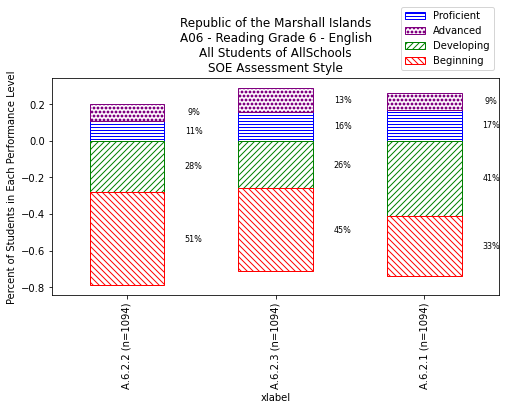

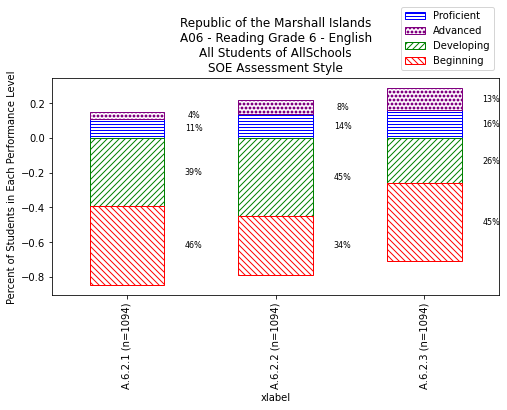

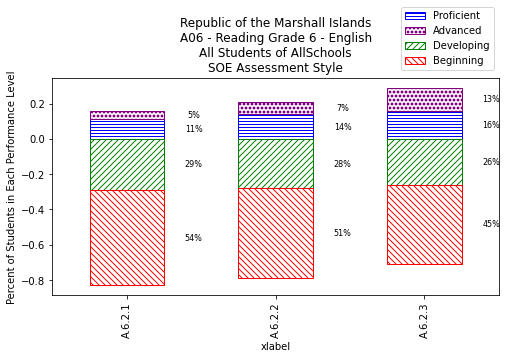

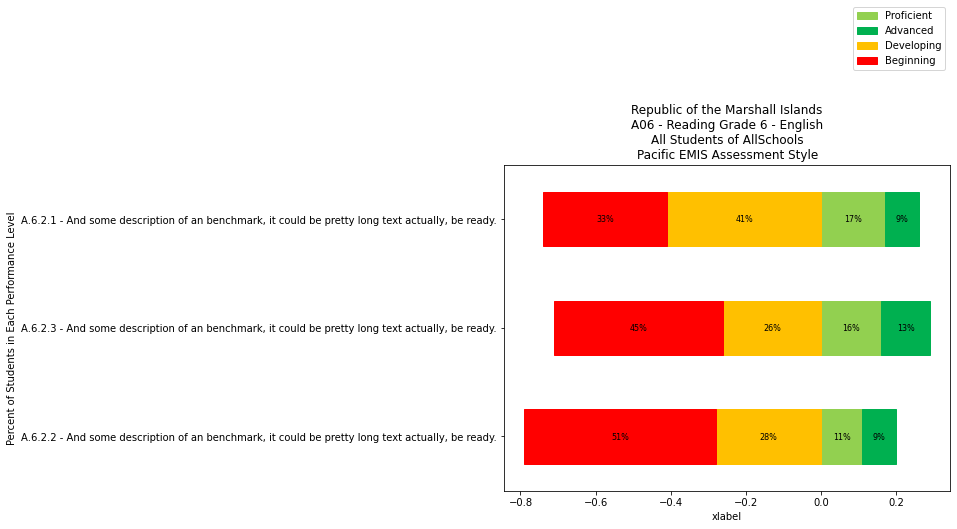

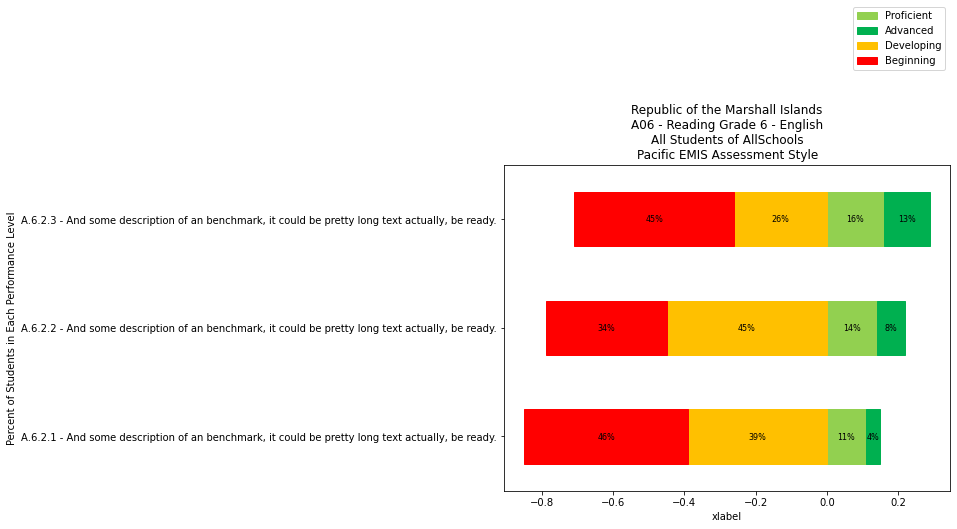

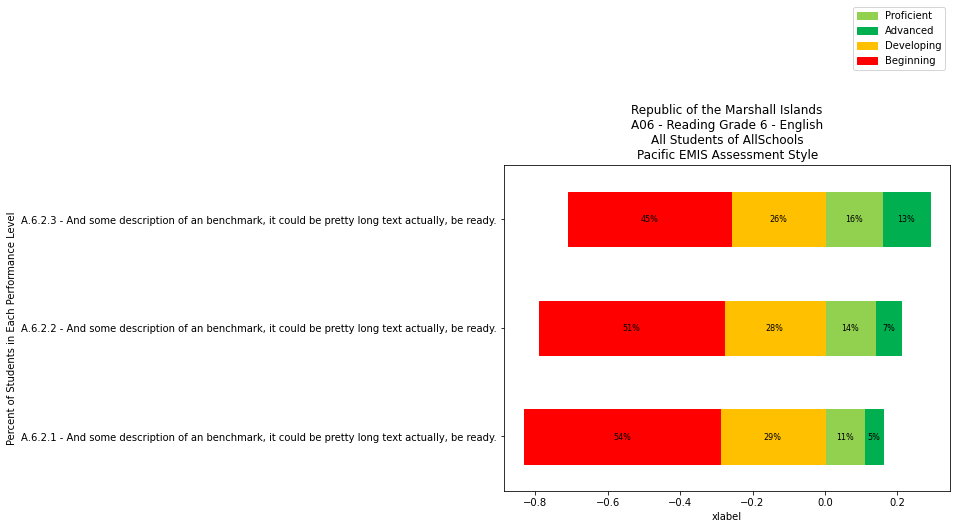

In [15]:
###############################################################################
# Results Sheet (continue)                                                    #
# Plotting anything and everything                                            #
###############################################################################

# All available DataFrames for plotting are packaged in the following Dicts
#  * students_each_rubric_level_plottable_dfs = {}
#  * students_each_rubric_level_soe_plottable_dfs = {}
# For example, access one like this students_each_rubric_level_plottable_dfs['df_indicators_summary_per']

#plot_soe(students_each_rubric_level_plottable_dfs['df_indicators_summary_per'])
#plot_emis(students_each_rubric_level_plottable_dfs['df_indicators_summary_per_x'])

plot_soe(students_each_rubric_level_plottable_dfs['df_benchmarks_summary_per'])
plot_soe(students_each_rubric_level_plottable_dfs['df_benchmarksalt_summary_per'])
plot_soe(students_each_rubric_level_soe_plottable_dfs['df_benchmarks_summary_per'])
plot_emis(students_each_rubric_level_plottable_dfs['df_benchmarks_summary_per_x'])
plot_emis(students_each_rubric_level_plottable_dfs['df_benchmarksalt_summary_per_x'])
plot_emis(students_each_rubric_level_soe_plottable_dfs['df_benchmarks_summary_per_x'])

#plot_soe(students_each_rubric_level_plottable_dfs['df_standards_summary_per'], 'Standard')
#plot_soe(students_each_rubric_level_soe_plottable_dfs['df_standards_summary_per'], 'Standard')
#plot_emis(students_each_rubric_level_plottable_dfs['df_standards_summary_per_x'], 'Standard')
#plot_emis(students_each_rubric_level_soe_plottable_dfs['df_standards_summary_per_x'], 'Standard')

#plot_soe(students_each_rubric_level_plottable_dfs['df_test_summary_per'])
#plot_soe(students_each_rubric_level_soe_plottable_dfs['df_test_summary_per'])
#plot_emis(students_each_rubric_level_plottable_dfs['df_test_summary_per_x'])
#plot_emis(students_each_rubric_level_soe_plottable_dfs['df_test_summary_per_x'])

In [16]:
# Write various DataFrame into Excel to examine (testing)
filename = os.path.join(cwd, 'data/RMI/soe-assessment-test.xlsx')
with pd.ExcelWriter(filename) as writer:
    # add DataFrames you want to write to Excel here
    df_student_results.to_excel(writer, index=False, sheet_name='Responses', engine='openpyxl')
    df_student_results_scores.to_excel(writer, index=False, sheet_name='Scores', engine='openpyxl')
    df_student_results_aggscores.to_excel(writer, index=False, sheet_name='AggregateScores', engine='openpyxl')